# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os

# Constants

In [2]:
# necessary to measure the IMT/LD, taken from the attributes of the used HDF5-files
CM_IN_PIXELS = 266.0282
MM_IN_PIXELS = CM_IN_PIXELS/10
BB_WIDTH = 267

# for creating reproducible results
SEED = 22
np.random.seed = SEED

# values for images
IMG_HEIGHT = 512

# number of classes
NUM_CLASSES = 4

# necessary colours
CLASS_BLACK = (0,0,0)
CLASS_RED = (255,0,0)
CLASS_GREEN = (0,255,0)
CLASS_BLUE = (0,0,255)
# all colours which identify a class
PALETTE = [CLASS_BLACK, CLASS_RED, CLASS_GREEN, CLASS_BLUE]

# directories that contain the results from pre-processing, should already exist
IMAGE_DIRECTORY = "./data/images/"
MASK_DIRECTORY = "./data/masks/"
FILENAME_DIRECTORY = './data/filenames/'
# directories that contain the results from U-Net, should already exist
RESULT_DIRECTORY = './data/results/'
# directories to save the results, should be created
PROBABILITY_DIRECTORY = './data/results/probability/'
AVERAGE_DIRECTORY = './data/results/average/'

In [3]:
# create the essential directories if they do not exist
if not os.path.exists(PROBABILITY_DIRECTORY):
    os.makedirs(PROBABILITY_DIRECTORY)
if not os.path.exists(AVERAGE_DIRECTORY):
    os.makedirs(AVERAGE_DIRECTORY)

# Load the results and test data

In [4]:
# this file can be quite big since it contains float values
results = np.load(RESULT_DIRECTORY + 'results.npy')

In [5]:
X_test = np.load(FILENAME_DIRECTORY + 'X_test.npy')
y_test = np.load(FILENAME_DIRECTORY + 'y_test.npy')

# One Hot Encoding and the reverse operation

In [6]:
def rgbToOnehot(rgbImage, palette=PALETTE):
    """Implements One Hot Encoding (OHE) for RGB images, 
    where each colour represents a class

    Parameters
    ----------
    rgbImage : numpy-array
        RGB-image where One Hot Encoding should be applied
    palette : list
        All colours that define a class
        
    Returns
    -------
    numpy-array
        One Hot encoded RGB image
    """
        
    # create new image
    labelImage = np.zeros((rgbImage.shape[:2]), dtype=np.uint8)
    # label the classes correctly
    labelImage[(rgbImage==palette[0]).all(axis=2)] = 0
    labelImage[(rgbImage==palette[1]).all(axis=2)] = 1
    labelImage[(rgbImage==palette[2]).all(axis=2)] = 2
    labelImage[(rgbImage==palette[3]).all(axis=2)] = 3
    # transform them into binary values
    onehotImage = tf.keras.utils.to_categorical(labelImage, 4)
    return onehotImage

def onehotToRgb(onehotImage, palette=PALETTE):
    """Reverts OHE and gives the image its initial
    colour back

    Parameters
    ----------
    onehotImage : numpy-array
        Image with OHE which should get its colour back
    palette : list
        All colours that define a class
        
    Returns
    -------
    numpy-array
        RGB image
    """
        
    # returns indices of the highest elements
    indices = np.argmax(onehotImage, axis=2)
    # use the initial image shape plus three channels for rgb
    rgbImage = np.zeros(onehotImage.shape[:2]+(3,))
    for i, colours in enumerate(palette):
        # get the colours back
        rgbImage[indices==i] = colours
    return np.uint8(rgbImage)

# Inspect some predictions

In [7]:
def createValidationImage(result, mask):
    """Create a validation image for a given prediction
    and mask, the validation image depicts correct predicted 
    pixels in the appropiate colour, missing pixel in pink 
    and excessive pixel in yellow

    Parameters
    ----------
    result : numpy-array
        Prediction result for the validation image
    mask : numpy-array
        Groundtruth/mask for the validation image
        
    Returns
    -------
    numpy-array
        Created validation image
    """
        
    # new validation image
    output = np.zeros(result.shape)
    # iterate over the prediction
    for y, column in enumerate(result):
        for x, pixel in enumerate(column): 
            # draw the correct pixels in the respective colour
            if(pixel == mask[y,x]).all():
                output[y,x] = pixel
            # draw missing pixel in pink
            elif(mask[y,x] != (0,0,0)).any() and (pixel == (0,0,0)).all():
                output[y,x] = (255, 0, 255)
            # draw excessive pixels in yellow
            elif(pixel != (0,0,0)).any() and (mask[y,x] == (0,0,0)).all():
                output[y,x] = (255,140,0)
    return output

File name: interobserver_medium_resultateT1_SAPCIMT-20100902-6701909-1946-M-67-2-50000045-671-LCCAE-SC-20110311-ClipResult.h5_106.npy


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


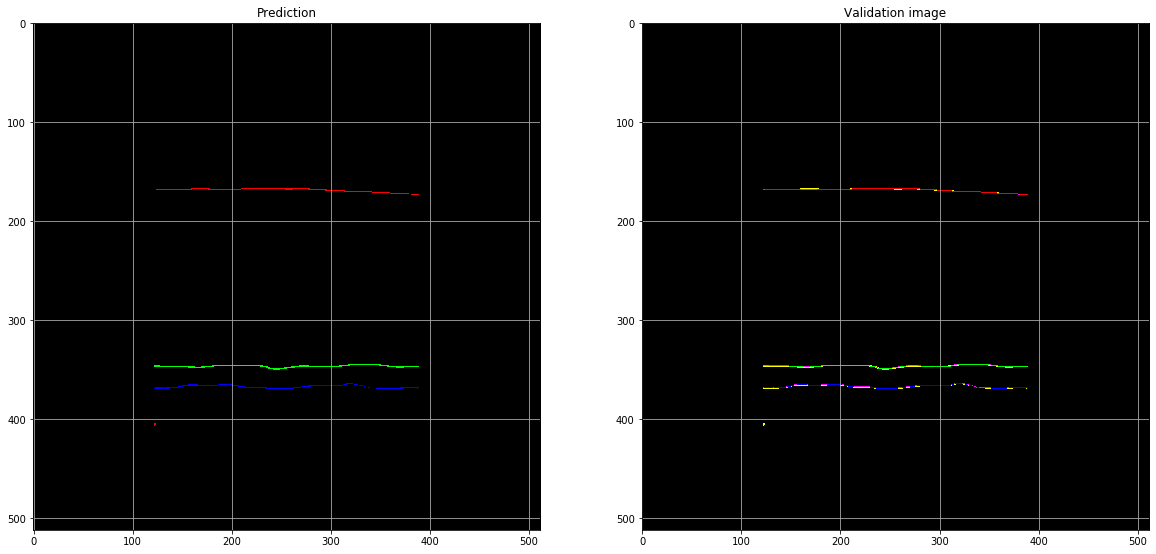

File name: interobserver_medium_resultateT1_SAPCIMT-20100902-6701909-1946-M-67-2-50000045-671-LCCAE-SC-20110311-ClipResult.h5_178.npy


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


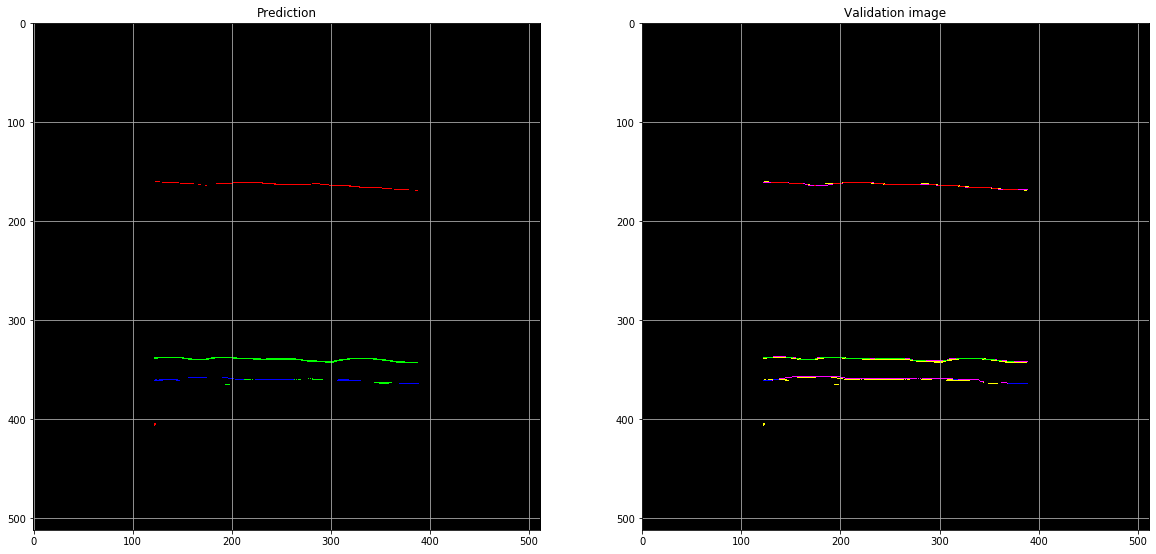

File name: interobserver_medium_resultateT0_SAPCIMT-20100902-6101247-1953-M-61-1-50000041-611-RCCAH-SC-20101214-ClipResult.h5_125.npy


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


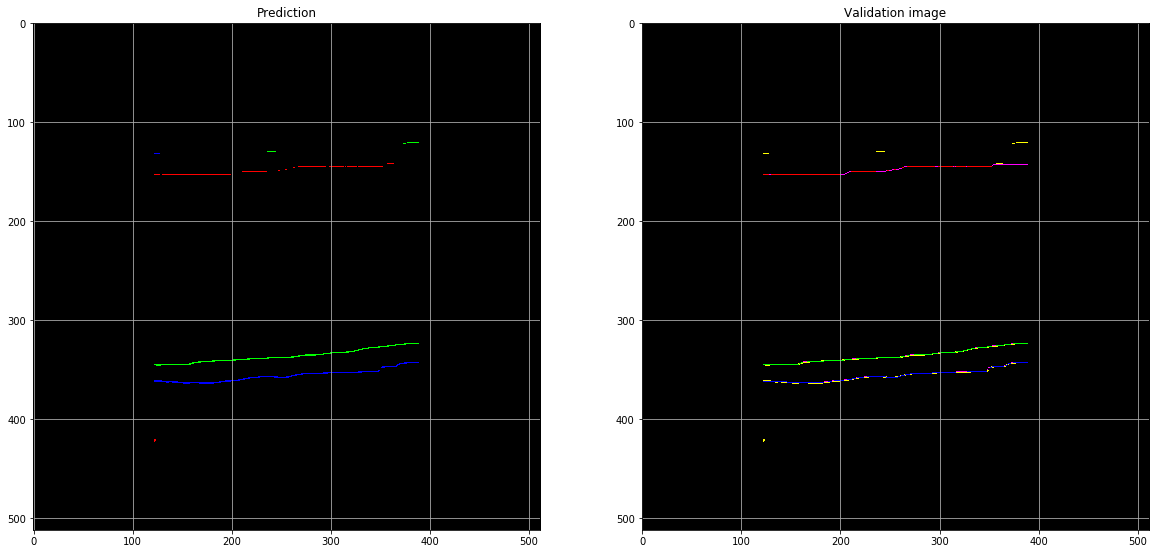

File name: interobserver_medium_resultateT0_SAPCIMT-20100901-6601595-1947-F-66-2-50000047-664-LCCAE-CM-20110309-ClipResult.h5_240.npy


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


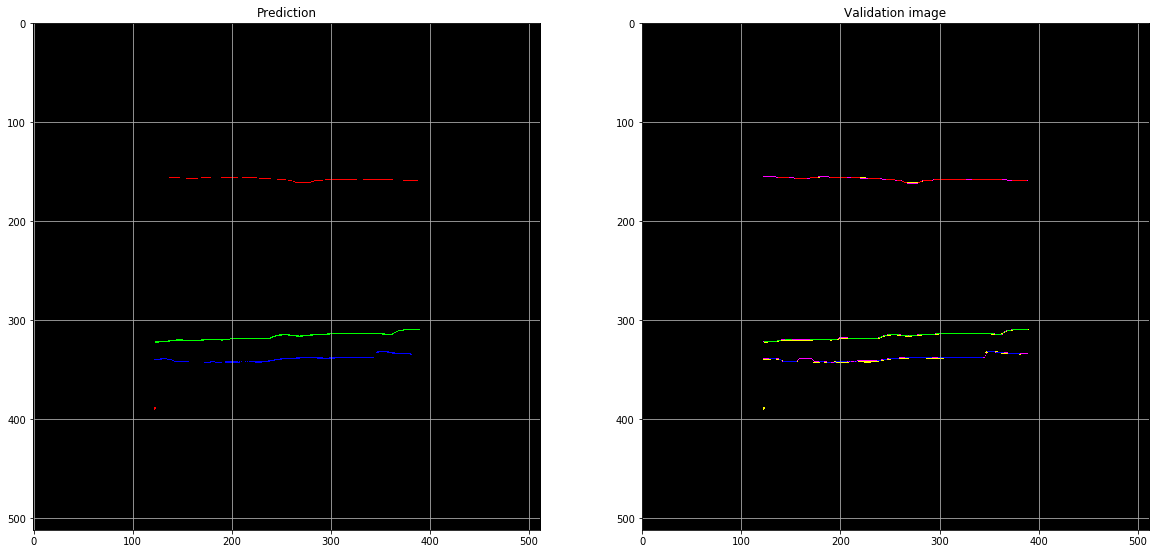

File name: interobserver_good_resultateT1_SAPCIMT-20100831-6302121-1959-M-63--50000044-634-RCCAH-SC-20110311-ClipResult.h5_186.npy


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


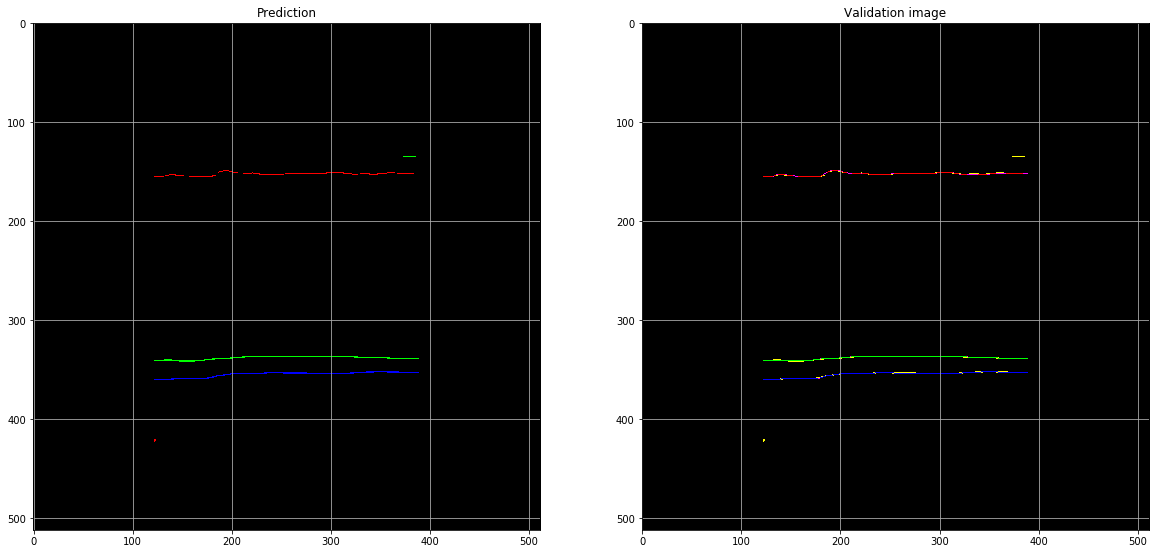

File name: interobserver_medium_resultateT1_SAPCIMT-20100902-6701909-1946-M-67-2-50000045-671-LCCAE-SC-20110311-ClipResult.h5_95.npy


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


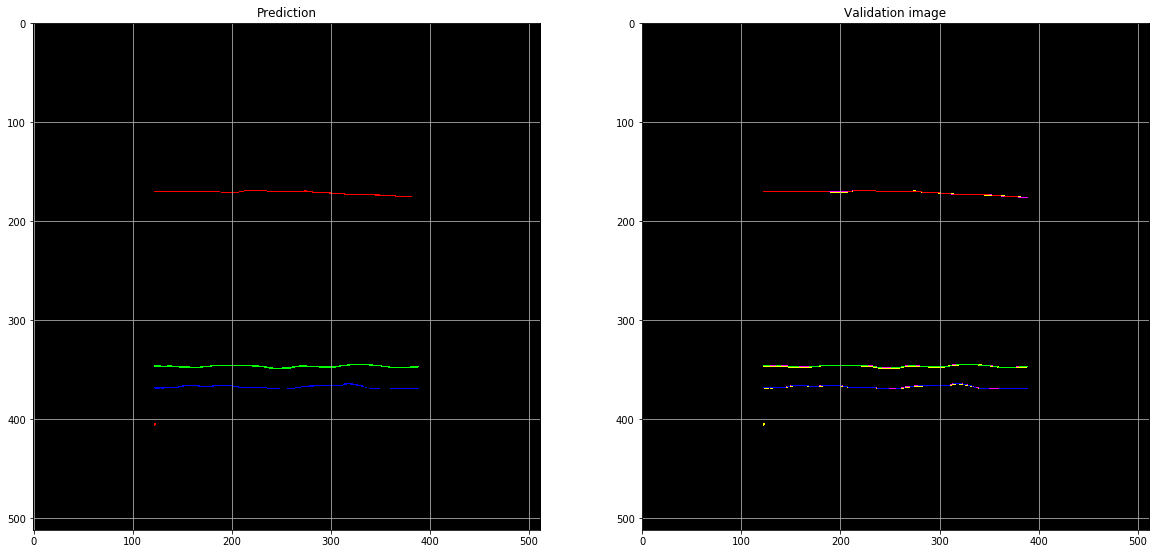

File name: interobserver_medium_resultateT0_SAPCIMT-20100902-6101247-1953-M-61-1-50000041-611-RCCAH-SC-20101214-ClipResult.h5_103.npy


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


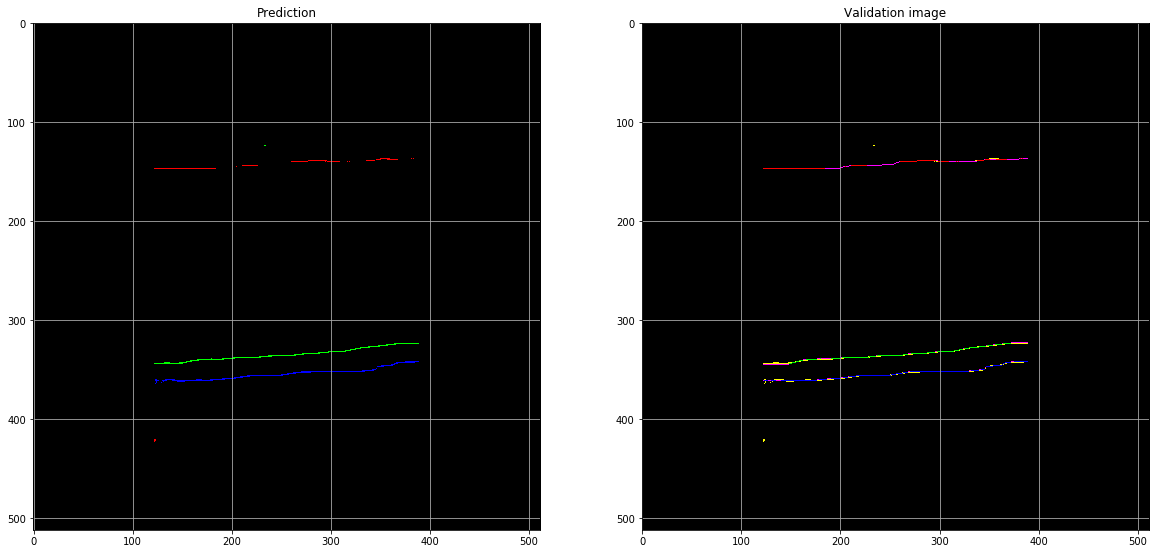

File name: interobserver_medium_resultateT0_SAPCIMT-20100901-6601595-1947-F-66-2-50000047-664-LCCAE-CM-20110309-ClipResult.h5_248.npy


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


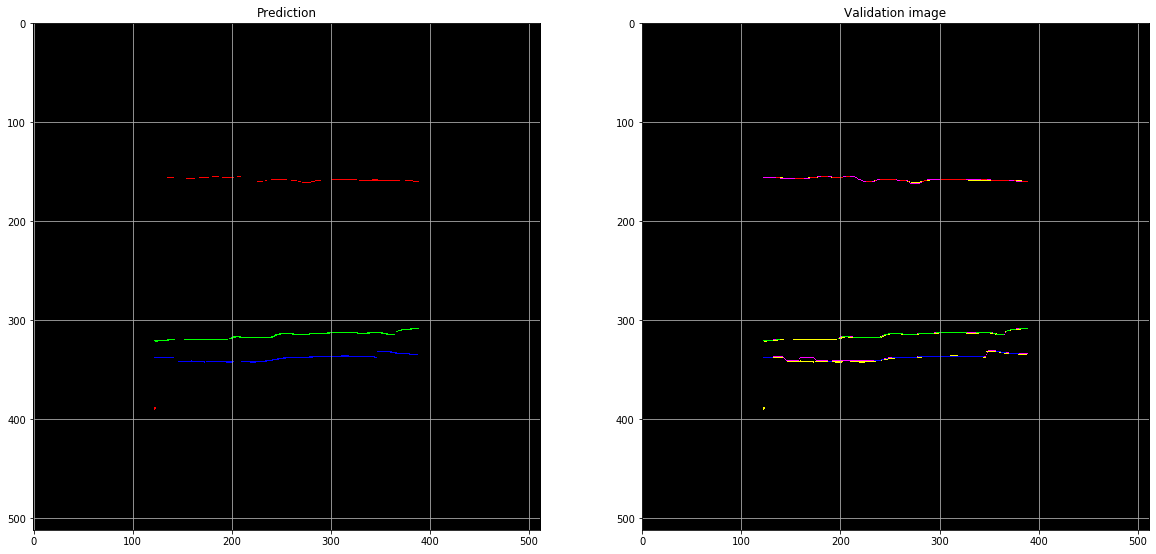

File name: interobserver_medium_resultateT0_SAPCIMT-20100902-6101247-1953-M-61-1-50000041-611-RCCAH-SC-20101214-ClipResult.h5_163.npy


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


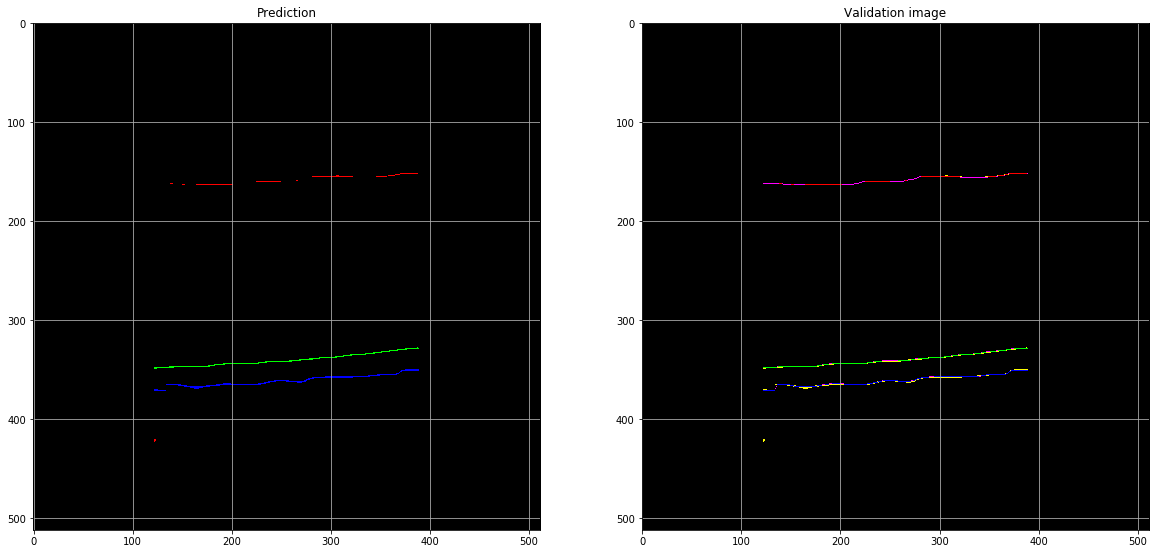

File name: interobserver_medium_resultateT1_SAPCIMT-20100902-6701909-1946-M-67-2-50000045-671-LCCAE-SC-20110311-ClipResult.h5_146.npy


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


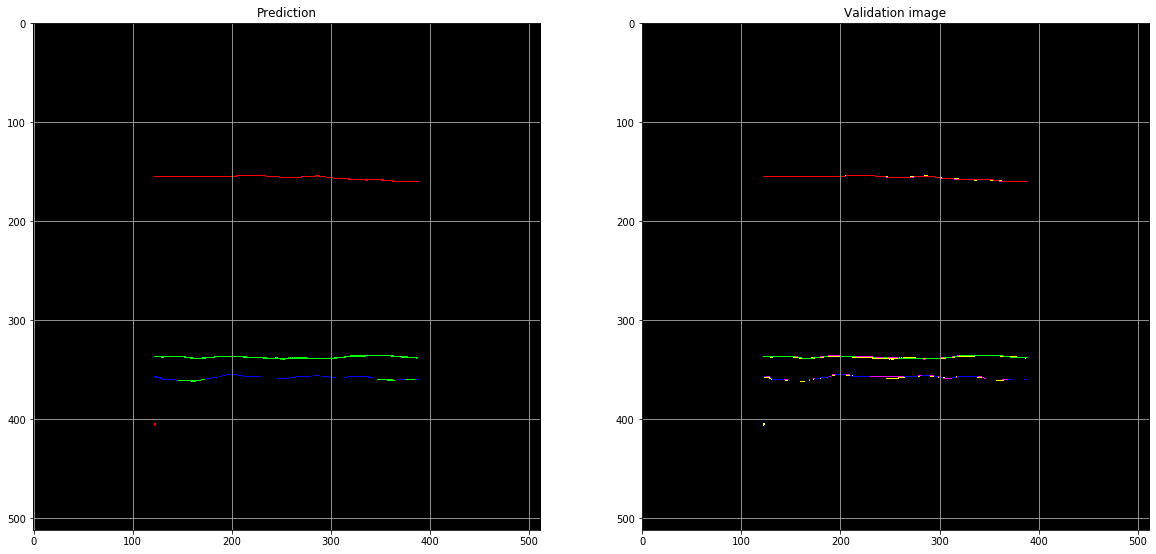

In [8]:
for i, file in enumerate(X_test[0:10]): 
    
    print('File name: ' + file)
    # get all files
    image = np.load(IMAGE_DIRECTORY + file)
    mask = np.load(MASK_DIRECTORY + y_test[i])
    result = onehotToRgb(results[i])
    # create validation image
    validation = createValidationImage(result, mask)
    
    # plot prediction and validation image
    fig = plt.figure(figsize=(20,20))
    
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_title('Prediction')
    ax1.imshow(result)
    ax1.grid(b=None)
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.set_title('Validation image')
    ax2.imshow(validation)
    ax2.grid(b=None)
    
    plt.show()

# Thin out the lines with the probability method

In [9]:
def thinOutLinesProbability(onehotImage, defaultClass=(1.,0.,0.,0.)):
    """Thin out all three lines of the prediction of the
    U-Net model with a probability approach, here all lines
    are shortened to a width of one pixel and only the 
    pixels with the highest probability are used

    Parameters
    ----------
    onehotImage : numpy-array
        Mask as One Hot encoded image (prediction result)
    defaultClass : tuple
        Class which represents the background
        
    Returns
    -------
    numpy-array
        Prediction result with thinned out lines
    """
    
    # lower limit for a majority
    probability = 1/NUM_CLASSES
    # iterate over columns
    for x in range(onehotImage.shape[1]):
        # tuple for highest values (probability value, y-coordinate, x-coordinate)
        highestMAN = (-1, -1, -1)
        highestLIF = (-1, -1, -1)
        highestMAF = (-1, -1, -1)
        # iterate over rows
        for y, pixel in enumerate(onehotImage[:,x]):
            # MAN line
            if pixel[1] > probability:
                # highest probability and top side of the image
                if pixel[1] > highestMAN[0] and y < IMG_HEIGHT/2:
                    # set the old pixel to default
                    onehotImage[highestMAN[1], highestMAN[2]] = defaultClass
                    # current pixel is the new highest probability
                    highestMAN = (pixel[1], y, x)
                else:
                    # lower than the current highest pixel so make it black
                    onehotImage[y,x] = defaultClass
            # LIF line
            if pixel[2] > probability:
                # highest probability and bot side of the image
                if pixel[2] > highestLIF[0] and y > IMG_HEIGHT/2:
                    onehotImage[highestLIF[1], highestLIF[2]] = defaultClass
                    highestLIF = (pixel[2], y, x)
                else:
                    onehotImage[y,x] = defaultClass
            # MAF line
            if pixel[3] > probability:
                # highest probability and bot side of the image
                if pixel[3] > highestMAF[0] and y > IMG_HEIGHT/2:
                    onehotImage[highestMAF[1], highestMAF[2]] = defaultClass
                    highestMAF = (pixel[3], y, x)
                else:
                    onehotImage[y,x] = defaultClass
    return onehotImage          

# Thin out the lines with the average method

In [10]:
def thinOutLinesAverage(rgbImage, defaultColour=CLASS_BLACK): 
    """Thin out all three lines of the prediction of the
    U-Net model with an average approach, here all lines
    are averaged to a width of one pixel

    Parameters
    ----------
    rgbImage : numpy-array
        Mask as RGB image (prediction result)
    defaultColour : tuple
        Colour which represents the background
        
    Returns
    -------
    numpy-array
        Prediction result with thinned out lines
    """
    
    for x in range(rgbImage.shape[1]):
        # all pixels of the respective colour of this column
        redPixels = []
        greenPixels = []
        bluePixels = []
        # the average pixel of the respective colour for this column
        averageRed = []
        averageGreen = []
        averageBlue = []
        
        for y, pixel in enumerate(rgbImage[:,x]):
            # red line -> MAN
            if (np.array_equal(pixel, CLASS_RED)):
                # has to be on top of the image
                if (y > IMG_HEIGHT/2):
                    # else reset it
                    rgbImage[y,x] = defaultColour
                else:
                    # valid pixel so append it
                    redPixels.append([y,x])
                    # reset the current pixel
                    rgbImage[y,x] = defaultColour
            # green line -> LIF
            elif (np.array_equal(pixel, CLASS_GREEN)):
                # has to be on bot of the image
                if (y < IMG_HEIGHT/2):
                    rgbImage[y,x] = defaultColour
                else:
                    greenPixels.append([y,x])
                    rgbImage[y,x] = defaultColour
            # blue line -> MAF
            elif (np.array_equal(pixel, CLASS_BLUE)):
                # has to be on bot of the image
                if(y < IMG_HEIGHT/2):
                    rgbImage[y,x] = defaultColour
                else:   
                    bluePixels.append([y,x])
                    rgbImage[y,x] = defaultColour
                    
        # when there are pixels
        if (len(redPixels) > 0):
            # average them
            averageRed = np.mean(redPixels, axis=0)
            # the average coordinates receive the colour for the class
            rgbImage[int(round(averageRed[0])),int(round(averageRed[1]))] = CLASS_RED
        if (len(greenPixels) > 0):        
            averageGreen = np.mean(greenPixels, axis=0)
            rgbImage[int(round(averageGreen[0])),int(round(averageGreen[1]))] = CLASS_GREEN   
        if (len(bluePixels) > 0):        
            averageBlue = np.mean(bluePixels, axis=0)
            rgbImage[int(round(averageBlue[0])),int(round(averageBlue[1]))] = CLASS_BLUE    
        
    return rgbImage          

# Helper methods for linear interpolation

In [11]:
def findNextPixel(rgbImage, colour, currentX):    
    """Finds the next pixel which has the wished colour 
    starting from the given x coordinate

    Parameters
    ----------
    rgbImage : numpy-array
        Mask as RGB image (prediction result)
    colour : tuple
        Colour that the next pixel should have
    currentX : int
        X-coordinate where the iteration starts
        
    Returns
    -------
    tuple
        Coordinates of the next pixel which has
        the wished colour
    """
    
    # iterate over the image
    for x in range(currentX, rgbImage.shape[1]):
        for y, pixel in enumerate(rgbImage[:,x]):
            # if it is the given colour return it
            if (np.array_equal(pixel, colour)):
                return (y,x)

def fillHole(rgbImage, lastPixel, colour, currentX):    
    """Applys linear interpolation at the given x-coordinate 
    of the given image, takes care of three cases: hole at 
    the beginning, hole at the end and hole in the middle 
    of the line

    Parameters
    ----------
    rgbImage : numpy-array
        Mask as RGB image (prediction result)
    lastPixel : tuple
        Coordinates of the lastly processed pixel
    colour : tuple
        Colour that the interpolated pixel should have
    currentX : int
        X-coordinate where the iteration starts
        
    Returns
    -------
    tuple
        Coordinates of the next pixel which has
        the wished colour
    """
    
    # find the next pixel               
    nextPixel = findNextPixel(rgbImage, colour, currentX)
    # no last pixel
    if not lastPixel:
        # hole at the start -> use current x-coord and y-coord where the next pixel is
        lastPixel = (nextPixel[0], currentX)
    # no next pixel
    if not nextPixel:
        # hole at the end -> use current x-coord and the y-coord where the last pixel is
        rgbImage[lastPixel[0], currentX] = colour
        # return the image and the newly created pixel
        return rgbImage, (lastPixel[0], currentX)
    
    # how far are they separated
    distance = nextPixel[1] - lastPixel[1]
    # get all x-coordinates for the whole distance
    x_new = []
    for i in range(distance):
        x_new.append(currentX + i)
    # interpolation
    y_new = np.interp(x_new, [lastPixel[1],nextPixel[1]], [lastPixel[0],nextPixel[0]])
    # round and cast to int
    y_new = np.around(y_new, 0)
    y_new = np.asarray(y_new, dtype=np.uint16)
    
    # fill in the interpolated values in the image
    for i, y in enumerate(y_new):
        rgbImage[y, x_new[i]] = colour
    
    # return the filled image, and the current interpolated pixel so the imt can be calculated instantly
    return rgbImage, (y_new[0],x_new[0])

# Measure the IMT and LD

In [12]:
def measureIMT(rgbImageOriginal, interpolation=False):
    """Measures the IMT and LD of the given mask and applies 
    interpolation if wished, this method also calculates 
    two safety variable to quickly see if holes are present
    

    Parameters
    ----------
    rgbImageOriginal : numpy-array
        Mask as RGB image (prediction result)
    interpolation : bool
        Determines if interpolation should be used
        
    Returns
    -------
    float
        Measured IMT value of the image
    float
        Measured LD value of the image
    float
        Safety variable to signalise if columns are missing
        for the measurement of IMT
    float
        Safety variable to signalise if columns are missing
        for the measurement of LD
    numpy-array
        Edited mask (prediction result), which only changes if 
        interpolation is used
    """
    
    # copy the image since the original image needs to be maintained
    rgbImage = rgbImageOriginal.copy()
    # all IMT/LD values
    imts = [] 
    lds = []
    # safety variables to detect holes in the predictions
    safetyIMT = 0
    safetyLD = 0
    # the lastly found pixel
    lastRed = ()
    lastGreen = ()
    lastBlue = ()
    
    for x in range(rgbImage.shape[1]):
        # amount of found pixel
        redFound = 0
        greenFound = 0
        blueFound = 0
        # current coordinates of the pixel
        redPixel = ()
        greenPixel = ()
        bluePixel = ()
        
        for y, pixel in enumerate(rgbImage[:,x]):
            # red line -> MAN
            if (np.array_equal(pixel, (255,0,0))):
                # current pixel
                redPixel = (y,x)
                # raise the amount of found pixel
                redFound += 1
            # green line -> LIF
            elif (np.array_equal(pixel, (0,255,0))):
                greenPixel = (y,x)
                greenFound += 1
            # blue line- > MAF
            elif (np.array_equal(pixel, (0,0,255))):
                bluePixel = (y,x)
                blueFound += 1
                
        # now we got the pixels so we can measure the IMT
        
        # when there are too many pixels cancel the measuring
        if (redFound > 1 or greenFound > 1 or blueFound > 1):
            print('Error in column ' + str(x) + ': Too many pixels - red pixels: ' + str(redFound) 
                  + ' - green pixels: ' + str(greenFound) + ' - blue pixels: ' + str(blueFound))
            continue

        # no colours found so just continue
        if (redFound < 1 and greenFound < 1 and blueFound < 1):
            continue
        # interpolation
        elif (interpolation):
            # no red found so fill the hole
            if (redFound < 1):
                # call helper method
                rgbImage, redPixel = fillHole(rgbImage, lastRed, CLASS_RED, x)
                # new pixel so increase the amount of found pixels
                redFound += 1
            else:
                # else it is the new lastly processed pixel
                lastRed = redPixel
            if (greenFound < 1):
                rgbImage, greenPixel = fillHole(rgbImage, lastGreen, CLASS_GREEN, x)
                greenFound += 1
            else:
                lastGreen = greenPixel
            if (blueFound < 1):
                rgbImage, bluePixel = fillHole(rgbImage, lastBlue, CLASS_BLUE, x)
                blueFound += 1
            else:
                lastBlue = bluePixel
                      
        # LIF (green) and MAF (blue) -> measure the imt
        if (greenFound == 1 and blueFound == 1):
            # calculate imt
            imt = bluePixel[0] - greenPixel[0]
            # append it in the list
            imts.append(imt)
            # raise safety variable
            safetyIMT += 1
        # MAN (red) and MAF (blue) -> measure the ld
        if (redFound == 1 and blueFound == 1):
            # calculate ld
            ld = bluePixel[0] - redPixel[0]
            # append it in the list
            lds.append(ld)
            # raise safety variable
            safetyLD += 1
    
    # calculate the average imt and ld in mm
    finalIMT = (sum(imts)/len(imts))/MM_IN_PIXELS
    finalLD = (sum(lds)/len(lds))/MM_IN_PIXELS
    # calculate the precentage of how many columns had a valid IMT/LD value
    safetyIMT = safetyIMT / BB_WIDTH
    safetyLD = safetyLD / BB_WIDTH
    
    return finalIMT, finalLD, safetyIMT, safetyLD, rgbImage

# Main method to control the post-processing

In [14]:
def createResultDictionary(filenameImage, filenameMask, prediction, 
                           size='1px', method='probability', interpolation=False):
    """Central method to control all post-processing steps,
    loads the image, mask and prediction result and edits 
    the lines with the appropiate methods, finally measures
    the IMT/LD and calculates the differences to the real
    IMT/LD values

    Parameters
    ----------
    filenameImage : string
        Path to the image
    filenameMask : string
        Path to the mask
    prediction : numpy-array
        Mask as RGB image (prediction result)
    size : string
        Size of the lines in the mask and prediction result
        (either 1px or 3px)
    method : string
        Specifies the kind of editing method to thin out 
        the lines (either probability or average)
    interpolaton : bool
        Determines if interpolation should be used
        
    Returns
    -------
    dictionary
        A dictionary with following objects: filename, image, 
        ground truth, prediction, imt from ground truth, 
        imt from prediction, differences
    """
    
    # get image
    image = np.load(IMAGE_DIRECTORY + filenameImage)
    # get the groundtruth/mask
    mask = np.load(MASK_DIRECTORY + filenameMask)
    # edit the line for the three pixel approach
    if (size=='3px'):
        mask = thinOutLinesAverage(mask)
    
    # edit the predictions -> probability
    if (method == 'probability'):
        # thin out the lines
        result = thinOutLinesProbability(prediction)
        # revert OHE
        result = onehotToRgb(result)
        # create file name
        filenameResult = filenameImage.rsplit('.', 1)[0] + '_probability.npy'
        # save result
        np.save(PROBABILITY_DIRECTORY + filenameResult, result)
    # edit the predictions -> average
    elif (method == 'average'):
        # revert OHE
        result = onehotToRgb(prediction)
        # thin out the lines
        result = thinOutLinesAverage(result)
        # create file name
        filenameResult = filenameImage.rsplit('.', 1)[0] + '_average.npy'
        # save result
        np.save(AVERAGE_DIRECTORY + filenameResult, result)
    else:
        print('No kind of result creation specified - skipping')
        
    # measure imt/ld from the mask
    trueIMT, trueLD, trueSafetyIMT, trueSafetyLD, _ = measureIMT(mask, interpolation=interpolation)
    # measure imt/ld from the prediction
    imt, ld, safetyIMT, safetyLD, _ = measureIMT(result, interpolation=interpolation)
    
    # get the differences
    diffIMT = trueIMT-imt
    diffLD = trueLD-ld
    
    return {'image_file':filenameImage, 'mask_file': filenameMask, 'result_file':filenameResult,
           'trueIMT_tuple':(trueIMT, trueLD, trueSafetyIMT, trueSafetyLD), 
            'imt_tuple':(imt, ld, safetyIMT, safetyLD), 'imt_diff':diffIMT, 'ld_diff':diffLD}

# Apply post-processing to each prediction result

In [16]:
# the execution of this cell may take a long time

# list for all results
allResults = []
# wished post-processing method, either probability or average
method = 'probability'
# load the results again so they are unedited in case they were edited already
results = np.load(RESULT_DIRECTORY + 'results.npy')

# apply post-processing, should be done once with probabilty and once with average
for i, prediction in enumerate(results):
    allResults.append(createResultDictionary(X_test[i], y_test[i], prediction, '1px', method, False))
    print (str(i+1) + ' out of ' + str(len(results)) + ' images done', end='\r')
    
# the created files are not as big as the result from the U-Net model since int-values are used for all images

# save the results for the probability method
if (method == 'probability'):
    np.save(RESULT_DIRECTORY + 'allResults_probability.npy', allResults)
# save the results for the average method
elif (method == 'average'):
    np.save(RESULT_DIRECTORY + 'allResults_average.npy', allResults)

# Achieved results

In [17]:
# load all edited results
resultsProb = np.load(RESULT_DIRECTORY + 'allResults_probability.npy', allow_pickle=True)
resultsAver = np.load(RESULT_DIRECTORY + 'allResults_average.npy', allow_pickle=True)

In [18]:
# calculate average values
avgIMTProb = (sum([abs(res['imt_diff']) for res in resultsProb])/len(resultsProb))
avgLDProb = (sum([abs(res['ld_diff']) for res in resultsProb])/len(resultsProb))

avgIMTAver = (sum([abs(res['imt_diff']) for res in resultsAver])/len(resultsAver))
avgLDAver = (sum([abs(res['ld_diff']) for res in resultsAver])/len(resultsAver))

In [19]:
print('Probabilty approach - Number of Images: ' + str(len(resultsProb)))
print('Average approach - Number of Images: ' + str(len(resultsAver)))
print('')
print('Probabilty approach - IMT differences: ' + str(avgIMTProb))
print('Probabilty approach - LD differences: ' + str(avgLDProb))
print('')
print('Average approach - IMT differences: ' + str(avgIMTAver))
print('Average approach - LD differences: ' + str(avgLDAver))

Probabilty approach - Number of Images: 107
Average approach - Number of Images: 107

Probabilty approach - IMT differences: 0.008345256855787542
Probabilty approach - LD differences: 0.016884214739946005

Average approach - IMT differences: 0.008496184673904018
Average approach - LD differences: 0.016594921987277564


# Add interpolation

In [20]:
def addInterpolationToResult(resultList, directory):
    """This method collects all edited predicitons with 
    holes and uses linear interpolation on them, also it
    inserts the results of the interpolation in the 
    appropiate dictionary as a new entry

    Parameters
    ----------
    resultList : list
        List of dictionaries with all results of the
        post-processing
    directory : string
        Path to the directory where the results are saved
    """
    interpolation = []
    # if holes are detected append the results in a list
    for res in resultList:
        if (res['imt_tuple'][2] < 1.0 or res['imt_tuple'][3] < 1.0):
            interpolation.append(res)
    # add interpolation to all appended results
    for i, res in enumerate(interpolation):
        interpolation[i]['interpolation'] = measureIMT(np.load(directory + res['result_file']), True)

## Add interpolation to the results (probability method)

In [21]:
# create and save interpolation result
addInterpolationToResult(resultsProb, PROBABILITY_DIRECTORY)
np.save(RESULT_DIRECTORY + 'allResults_probability_with_interpolation.npy', resultsProb)

## Evaluate interpolation results (probability method)

In [22]:
# load results with interpolation
resultsProbInter = np.load(RESULT_DIRECTORY + 'allResults_probability_with_interpolation.npy', allow_pickle = True)

In [23]:
# find all results with interpolation
interpolationProb = []
for res in resultsProbInter:
    if 'interpolation' in res:
        interpolationProb.append(res)

In [25]:
# check if interpolation was successful
# interpolation is only unsuccessful if one or more predicted lines extend over 
# too much columns or if all three lines miss a pixel at the same column
for tup in interpolationProb:
    if (tup['interpolation'][2] != 1.0 and tup['interpolation'][3] != 1.0):
        print('Interpolation unsuccessful for file: ' + tup['image_file'])

In [26]:
# collect the differences before and after interpolation
interpolationIMTDiff = 0
interpolationLDDiff = 0
imtDiff = 0
ldDiff = 0
for tup in interpolationProb:
    interIMTDiff = tup['trueIMT_tuple'][0] - tup['interpolation'][0]
    interLDDiff = tup['trueIMT_tuple'][1] - tup['interpolation'][1]
    
    imtDiff += (abs(tup['imt_diff']))
    ldDiff += (abs(tup['ld_diff']))    
    
    interpolationIMTDiff += (abs(interIMTDiff))
    interpolationLDDiff += (abs(interLDDiff))

In [27]:
print('Probability: ')
print('IMT from images with holes without Interpolation: ' + str(imtDiff/len(interpolationProb)))
print('IMT from images with holes with Interpolation: ' + str(interpolationIMTDiff/len(interpolationProb)))
print('')
print('LD from images with holes without Interpolation: ' + str(ldDiff/len(interpolationProb)))
print('LD from images with holes with Interpolation: ' + str(interpolationLDDiff/len(interpolationProb)))

Probability: 
IMT from images with holes without Interpolation: 0.008398750375086859
IMT from images with holes with Interpolation: 0.027890514241762254

LD from images with holes without Interpolation: 0.01695584025563371
LD from images with holes with Interpolation: 0.011687941600779232


## Add interpolation to the results (average method)

In [28]:
# create and save interpolation result
addInterpolationToResult(resultsAver, AVERAGE_DIRECTORY)
np.save(RESULT_DIRECTORY + 'allResults_average_with_interpolation.npy', resultsAver)

## Evaluate interpolation results (average method)

In [29]:
# load results with interpolation
resultsAverInter = np.load(RESULT_DIRECTORY + 'allResults_average_with_interpolation.npy', allow_pickle = True)

In [30]:
# find all results with interpolation
interpolationAver = []
for res in resultsAverInter:
    if 'interpolation' in res:
        interpolationAver.append(res)

In [33]:
# check if interpolation was successful
# interpolation is only unsuccessful if one or more predicted lines extend over 
# too much columns or if all three lines miss a pixel at the same column
for tup in interpolationAver:
    if (tup['interpolation'][2] != 1.0 and tup['interpolation'][3] != 1.0):
        print('Interpolation unsuccesful for file: ' + tup['image_file'])

In [34]:
# collect the differences before and after interpolation
interpolationIMTDiff = 0
interpolationLDDiff = 0
imtDiff = 0
ldDiff = 0
for tup in interpolationAver:
    interIMTDiff = tup['trueIMT_tuple'][0] - tup['interpolation'][0]
    interLDDiff = tup['trueIMT_tuple'][1] - tup['interpolation'][1]
    
    imtDiff += (abs(tup['imt_diff']))
    ldDiff += (abs(tup['ld_diff']))    
    
    interpolationIMTDiff += (abs(interIMTDiff))
    interpolationLDDiff += (abs(interLDDiff))

In [35]:
print('Average: ')
print('IMT from images with holes without Interpolation: ' + str(imtDiff/len(interpolationAver)))
print('IMT from images with holes with Interpolation: ' + str(interpolationIMTDiff/len(interpolationAver)))
print('')
print('LD from images with holes without Interpolation: ' + str(ldDiff/len(interpolationAver)))
print('LD from images with holes with Interpolation: ' + str(interpolationLDDiff/len(interpolationAver)))

Average: 
IMT from images with holes without Interpolation: 0.008573681010142378
IMT from images with holes with Interpolation: 0.03402301433565782

LD from images with holes without Interpolation: 0.016679756422240347
LD from images with holes with Interpolation: 0.011691648185903404


# Further inspect the results

In [36]:
# specify the array to inspect
allRes = resultsProb.copy()
# specify the result directory based on the post-processing method
resultDirecotry = PROBABILITY_DIRECTORY
# sort the values to get bad/good results
allRes = sorted(allRes, key = lambda i: abs(i['imt_diff']), reverse=True) 

In [37]:
# list all values
for i, ele in enumerate(allRes):
    print(i,abs(ele['imt_diff']))

0 0.06164666528755214
1 0.06153198919116187
2 0.036561992653093234
3 0.03469819234494209
4 0.028291901361807925
5 0.025168855458626793
6 0.02489661802163634
7 0.024180084177778616
8 0.02076303679402347
9 0.020399678895193785
10 0.020337509914422403
11 0.018833430842493226
12 0.017651189113870203
13 0.016011952186345657
14 0.015872885806034298
15 0.015142549738168198
16 0.015045632704506096
17 0.014826579999838718
18 0.014802696572963292
19 0.014641797697170111
20 0.013722410446876943
21 0.0135806193304161
22 0.013325392387647739
23 0.012144784080075022
24 0.01213434129445512
25 0.010825317356702557
26 0.010277415691282932
27 0.009964759921275879
28 0.009950427653380944
29 0.009908886280918683
30 0.009199301456049747
31 0.009179704282089474
32 0.009175664329631017
33 0.00870133806703699
34 0.008510302176107265
35 0.008252255802694952
36 0.008165617946498727
37 0.007884044913860855
38 0.007839484044016798
39 0.007464427959377851
40 0.006357919076963481
41 0.006335393234352504
42 0.006253

File name: interobserver_medium_resultateT0_SAPCIMT-20100902-6701909-1946-M-67-2-50000045-671-LCCAE-CM-20110309-ClipResult.h5_122.npy
Index: 0
IMT-Diff: -0.06164666528755214
LD-Diff: -0.05882468191721113


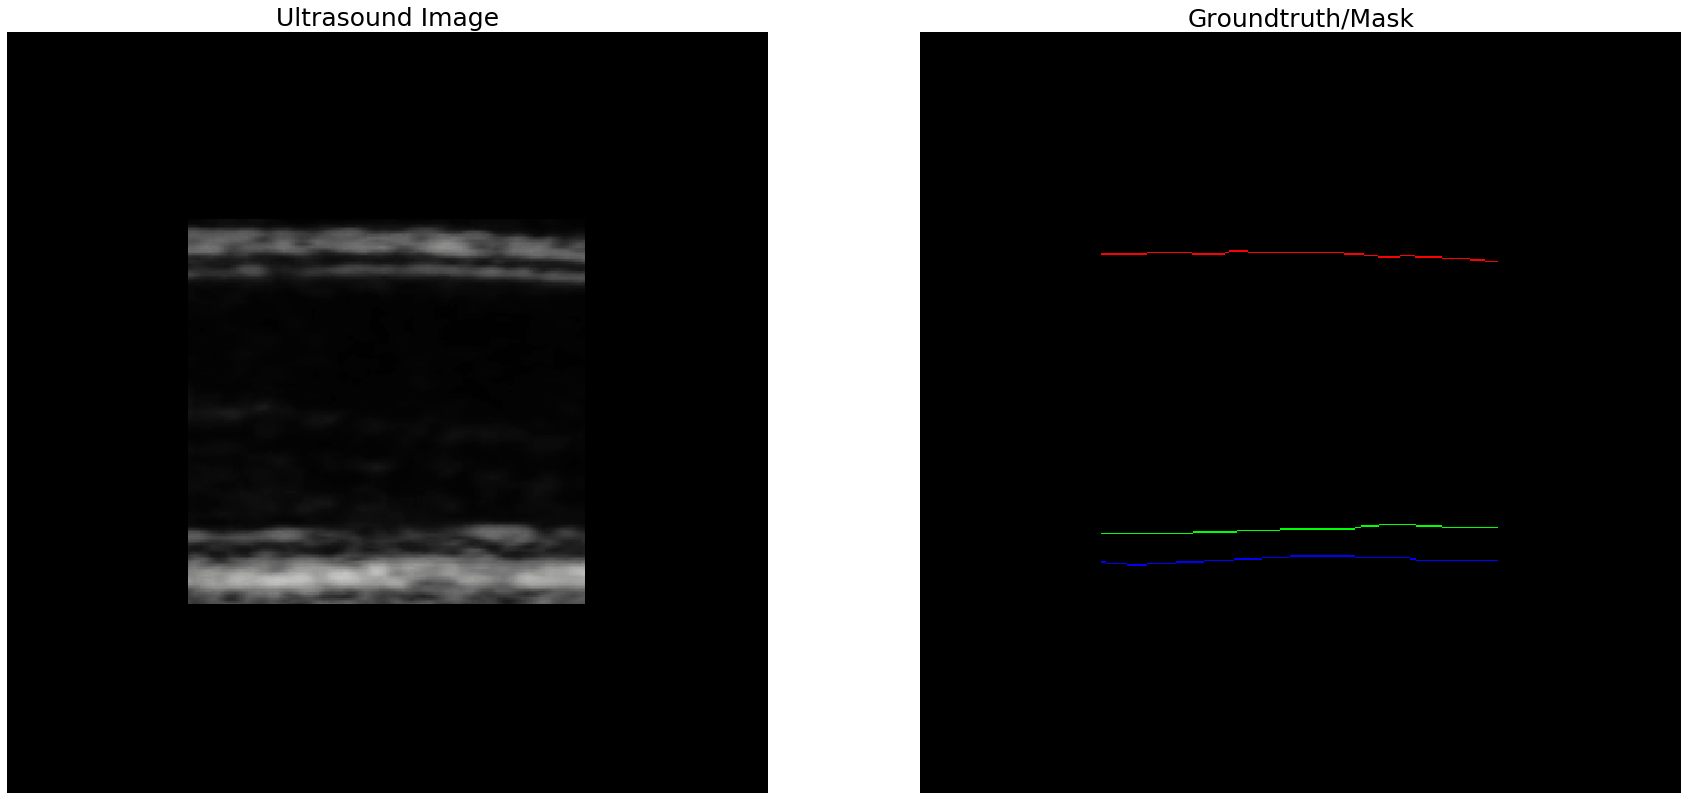

File name: interobserver_medium_resultateT0_SAPCIMT-20100901-6601595-1947-F-66-2-50000047-664-LCCAE-CM-20110309-ClipResult.h5_185.npy
Index: 1
IMT-Diff: 0.06153198919116187
LD-Diff: 0.11237750382900913


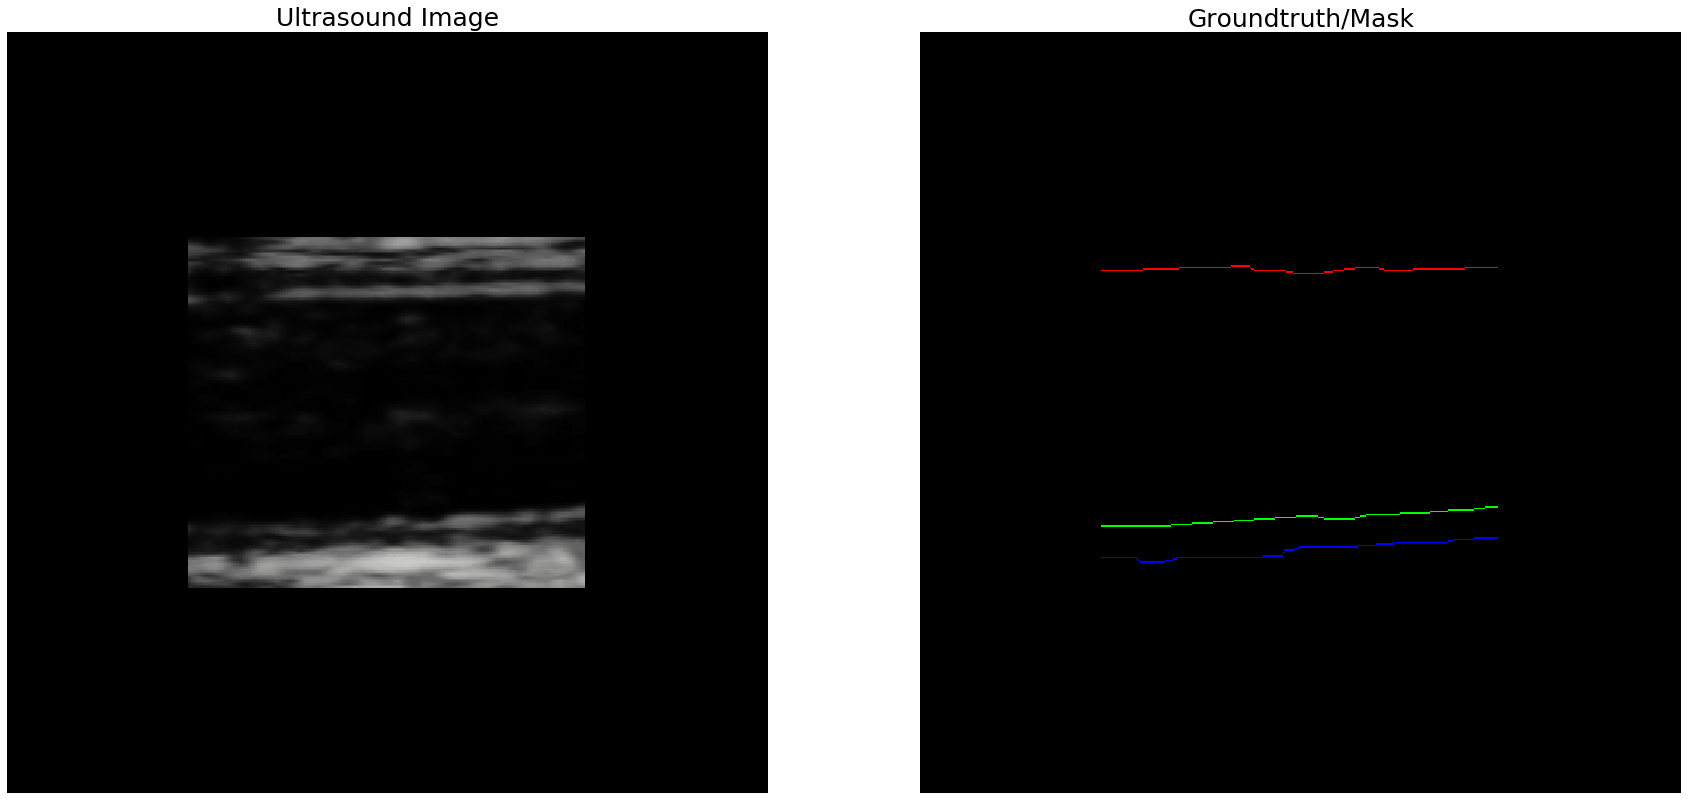

File name: interobserver_medium_resultateT0_SAPCIMT-20100901-6601595-1947-F-66-2-50000047-664-LCCAE-CM-20110309-ClipResult.h5_184.npy
Index: 2
IMT-Diff: 0.036561992653093234
LD-Diff: 0.09345268166735199


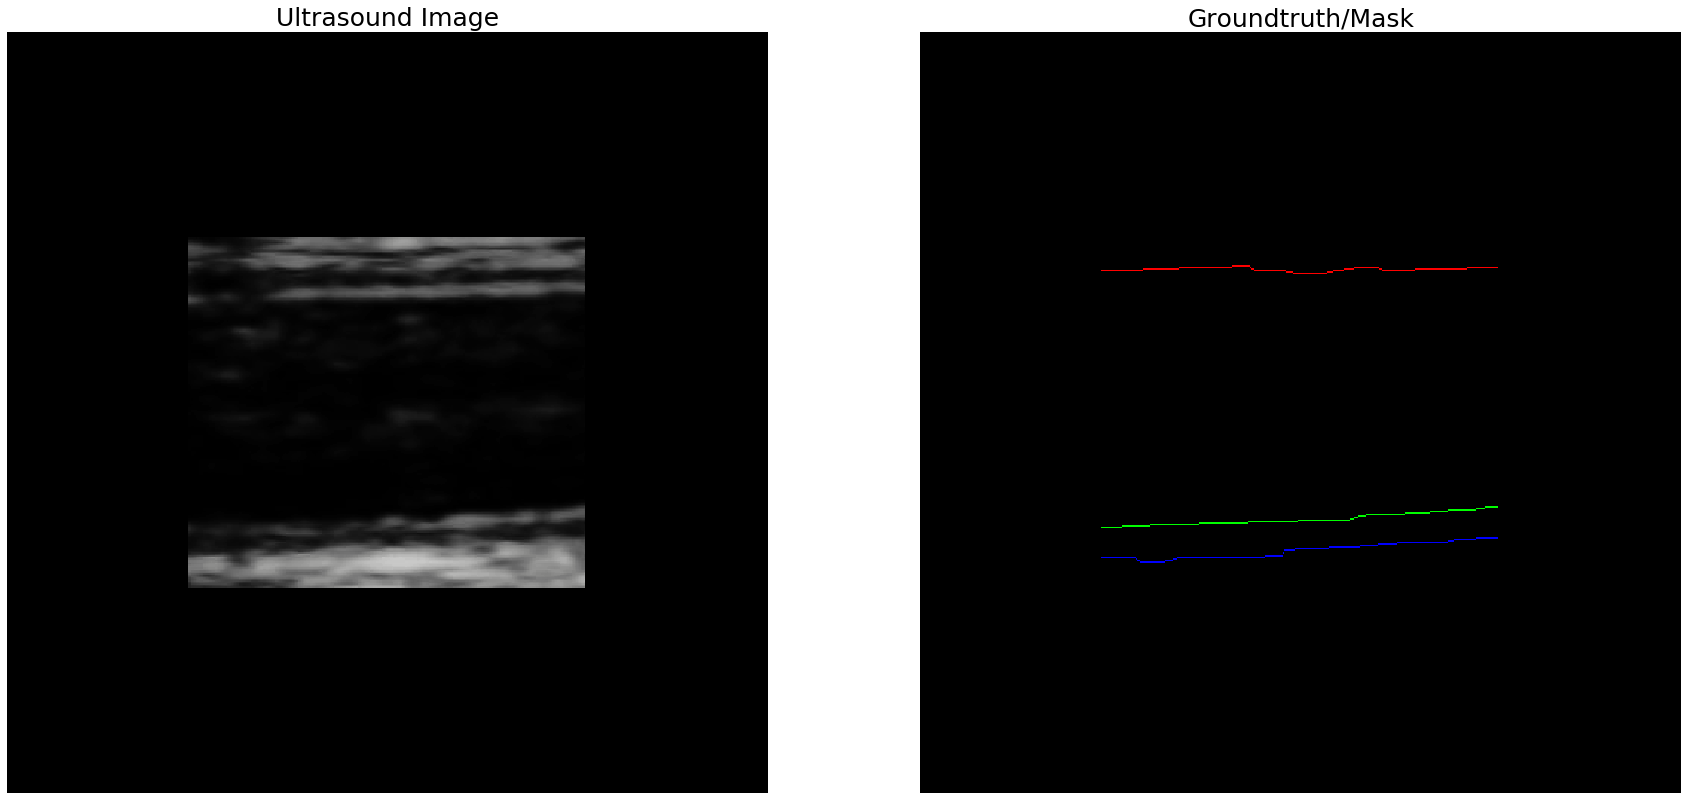

File name: interobserver_medium_resultateT0_SAPCIMT-20100901-6601595-1947-F-66-2-50000047-664-LCCAE-CM-20110309-ClipResult.h5_191.npy
Index: 3
IMT-Diff: 0.03469819234494209
LD-Diff: 0.02336343327773882


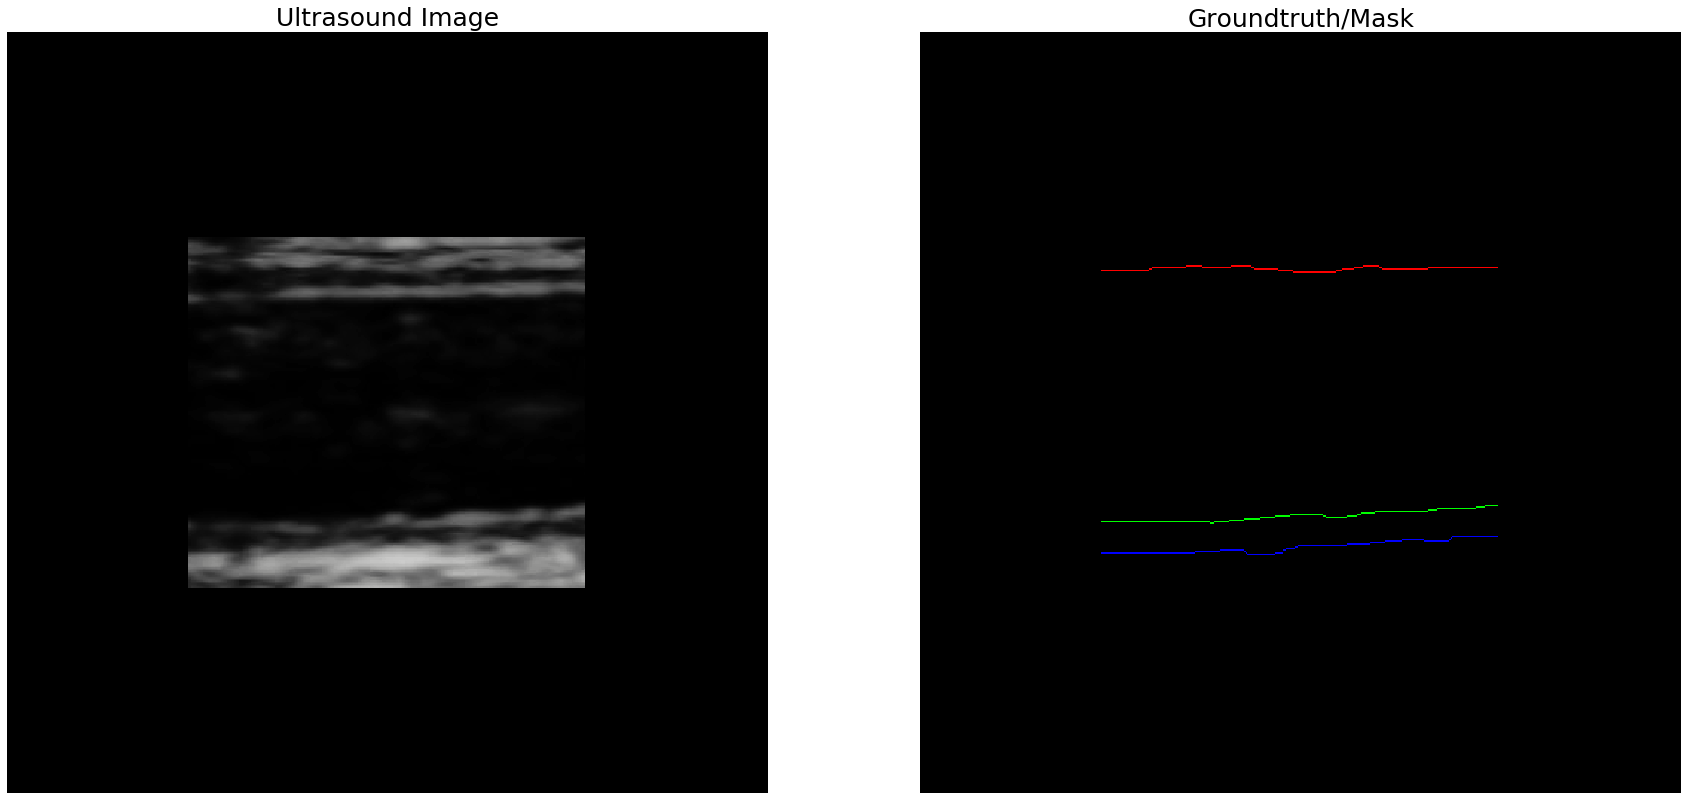

File name: interobserver_medium_resultateT0_SAPCIMT-20100902-6701909-1946-M-67-2-50000045-671-LCCAE-CM-20110309-ClipResult.h5_130.npy
Index: 4
IMT-Diff: -0.028291901361807925
LD-Diff: -0.06384065144279827


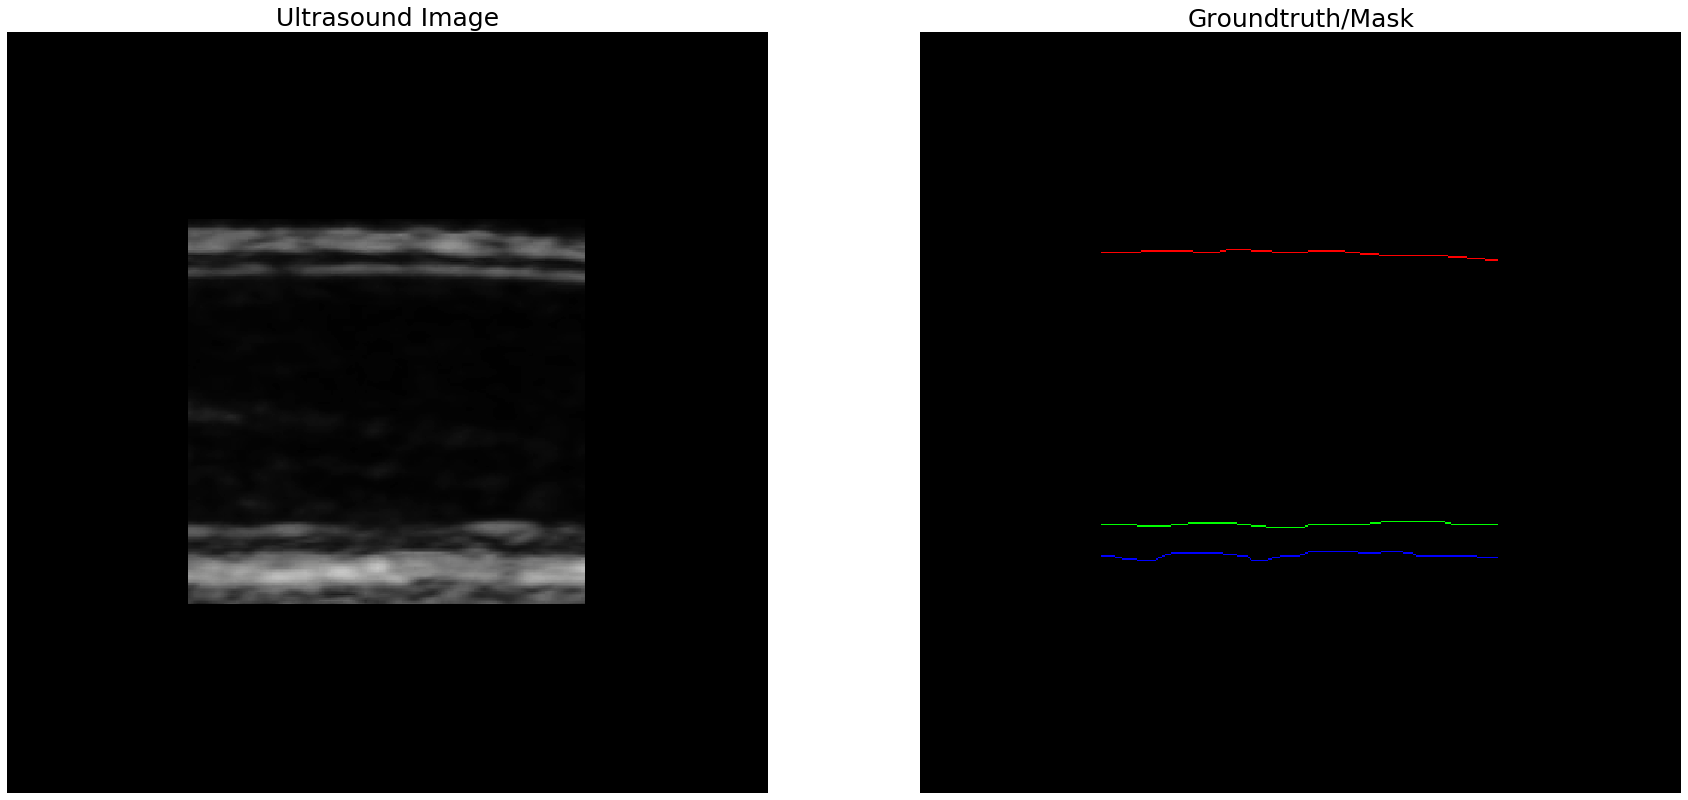

File name: interobserver_medium_resultateT0_SAPCIMT-20100901-6601595-1947-F-66-2-50000047-664-LCCAE-CM-20110309-ClipResult.h5_169.npy
Index: 5
IMT-Diff: 0.025168855458626793
LD-Diff: 0.10128709933420943


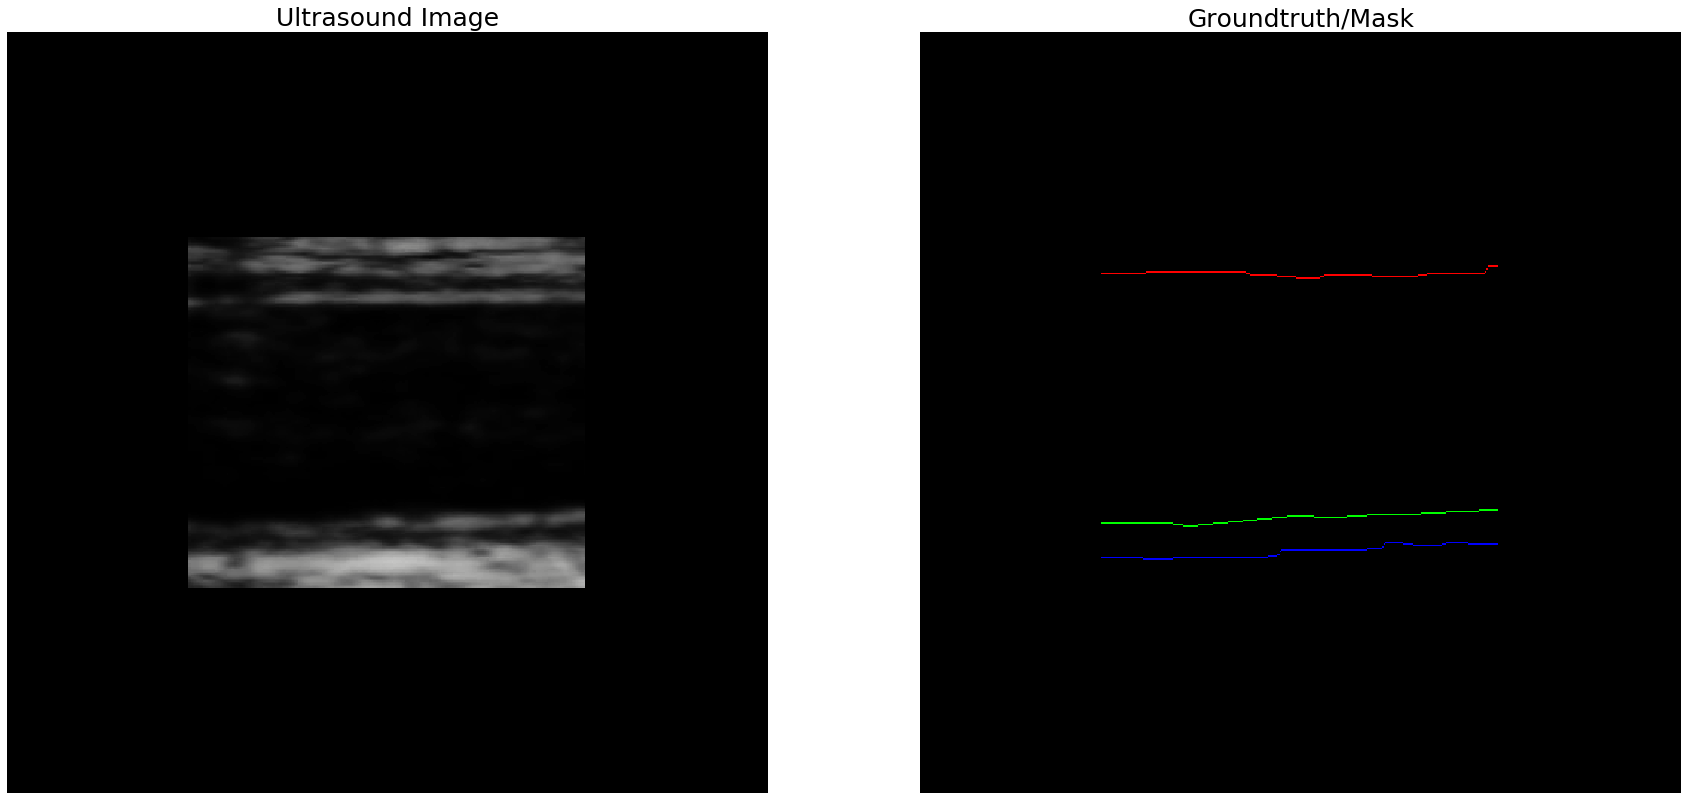

File name: interobserver_medium_resultateT0_SAPCIMT-20100901-6601595-1947-F-66-2-50000047-664-LCCAE-CM-20110309-ClipResult.h5_250.npy
Index: 6
IMT-Diff: -0.02489661802163634
LD-Diff: -0.00038690970671773073


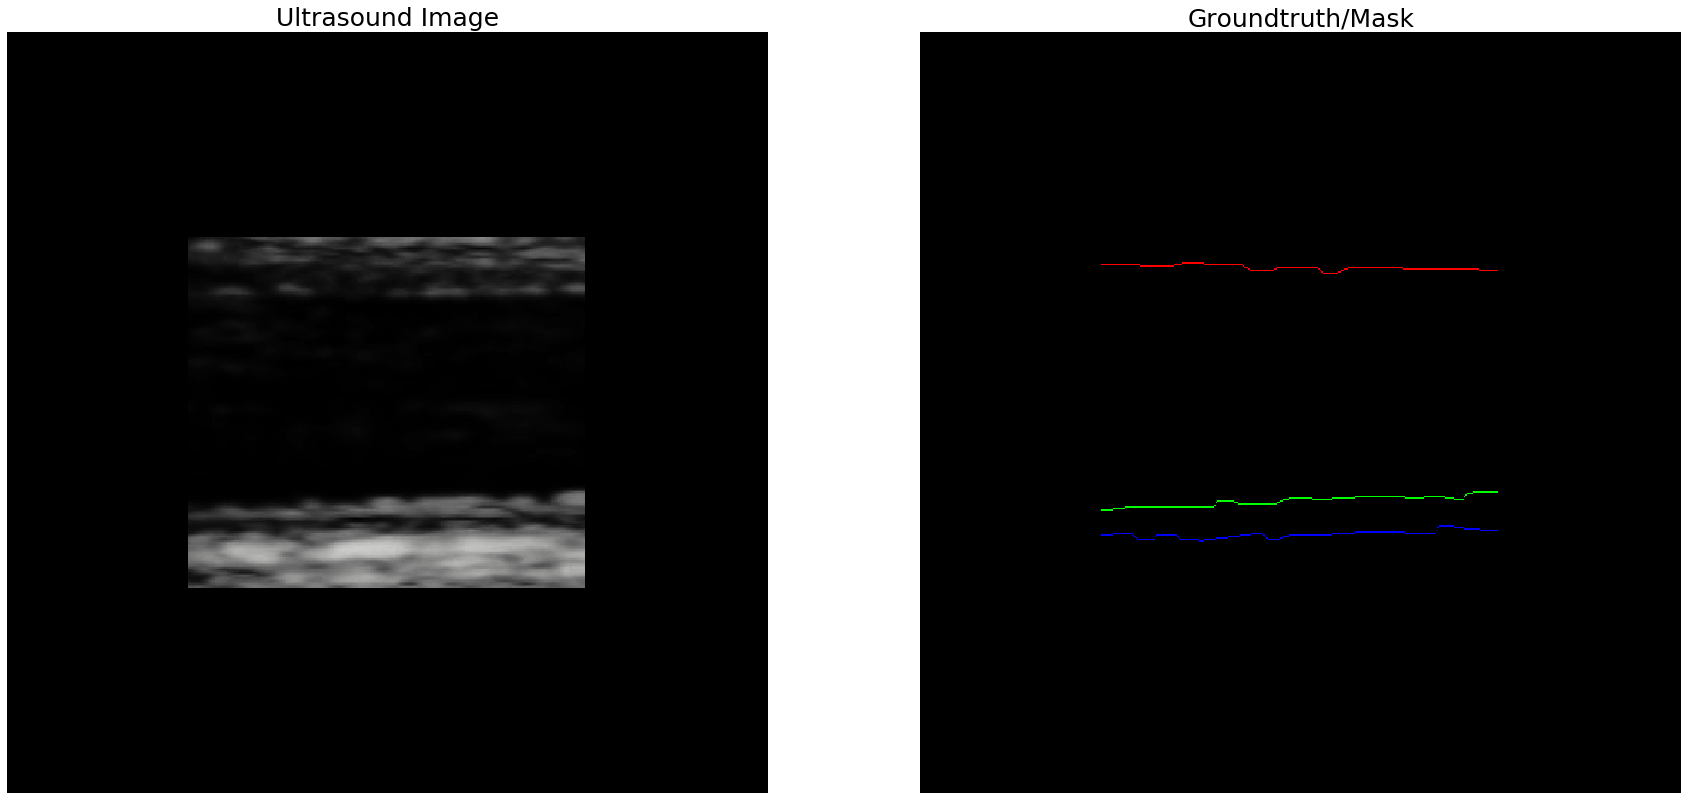

File name: interobserver_medium_resultateT0_SAPCIMT-20100901-6601595-1947-F-66-2-50000047-664-LCCAE-CM-20110309-ClipResult.h5_253.npy
Index: 7
IMT-Diff: -0.024180084177778616
LD-Diff: 0.009861670273966006


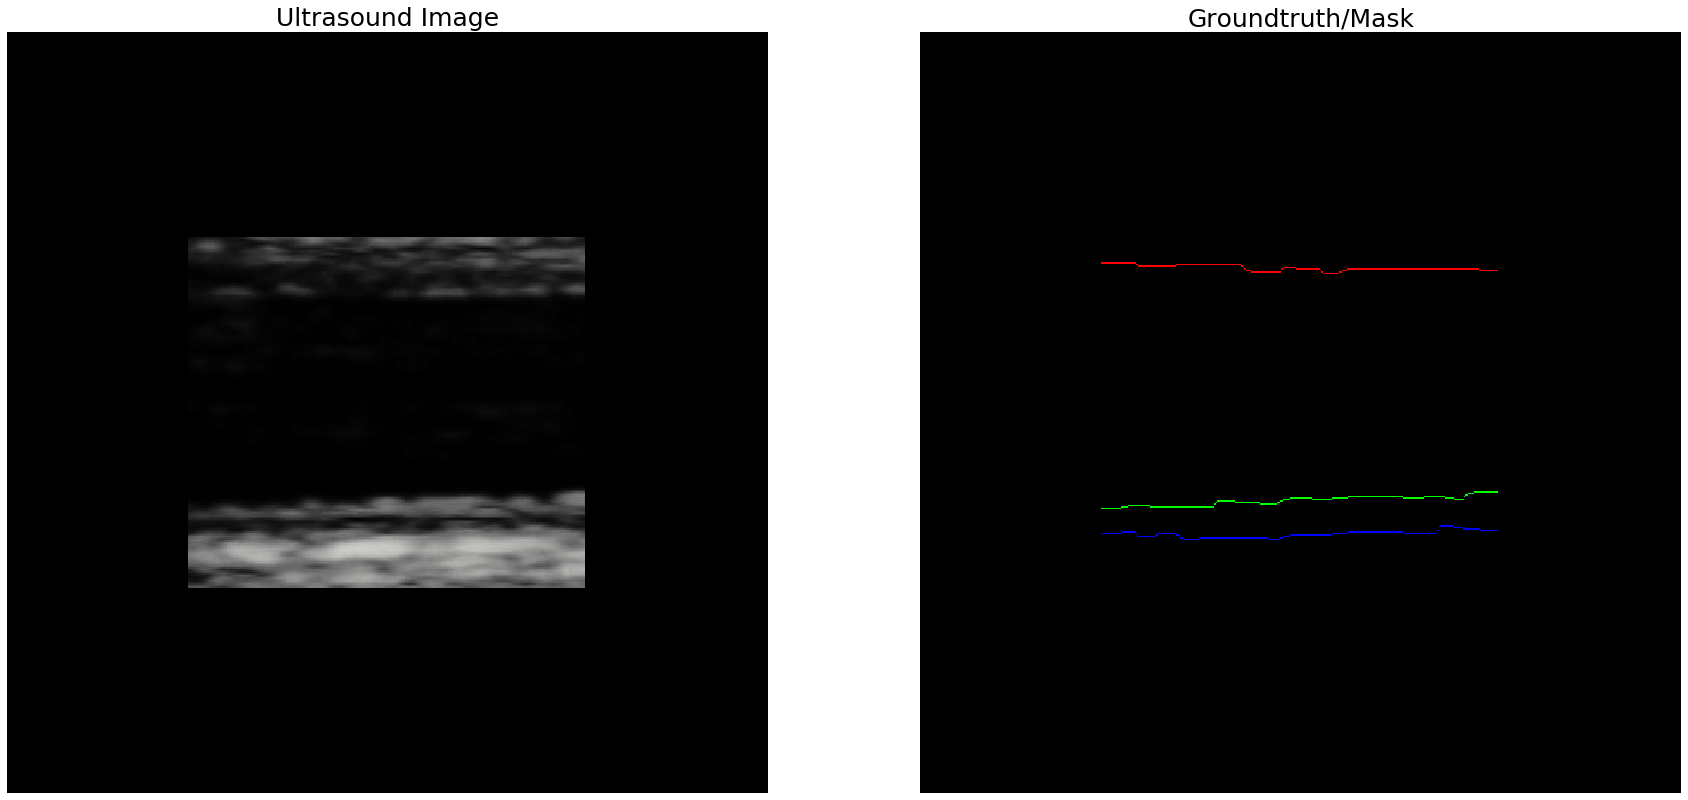

File name: interobserver_medium_resultateT0_SAPCIMT-20100901-6601595-1947-F-66-2-50000047-664-LCCAE-CM-20110309-ClipResult.h5_208.npy
Index: 8
IMT-Diff: 0.02076303679402347
LD-Diff: -0.024978640862678425


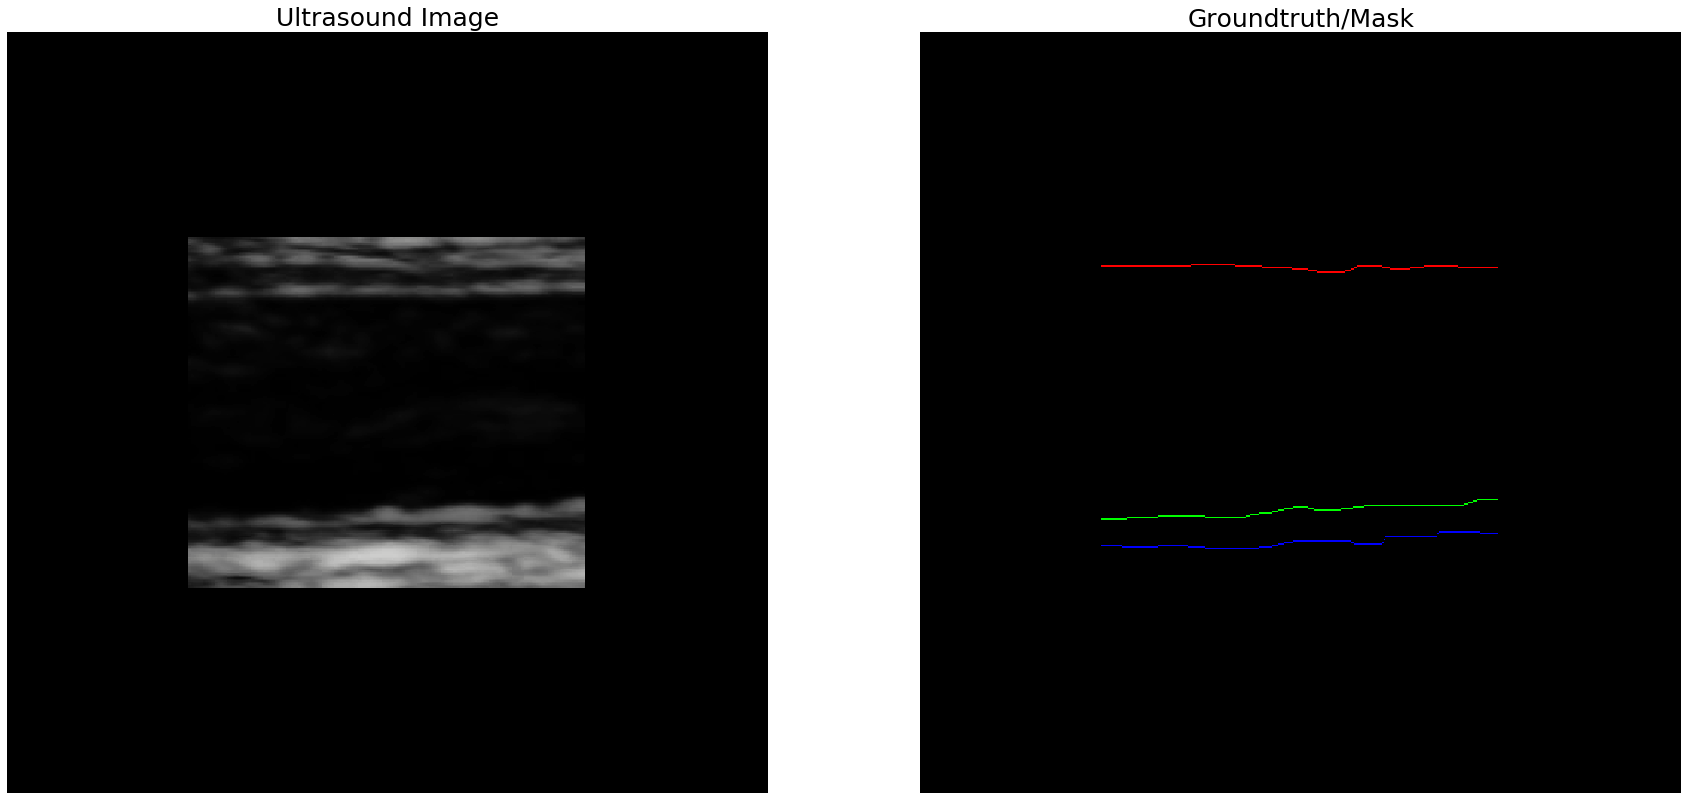

File name: interobserver_medium_resultateT1_SAPCIMT-20100902-6701909-1946-M-67-2-50000045-671-LCCAE-SC-20110311-ClipResult.h5_178.npy
Index: 9
IMT-Diff: -0.020399678895193785
LD-Diff: -0.04906573798966729


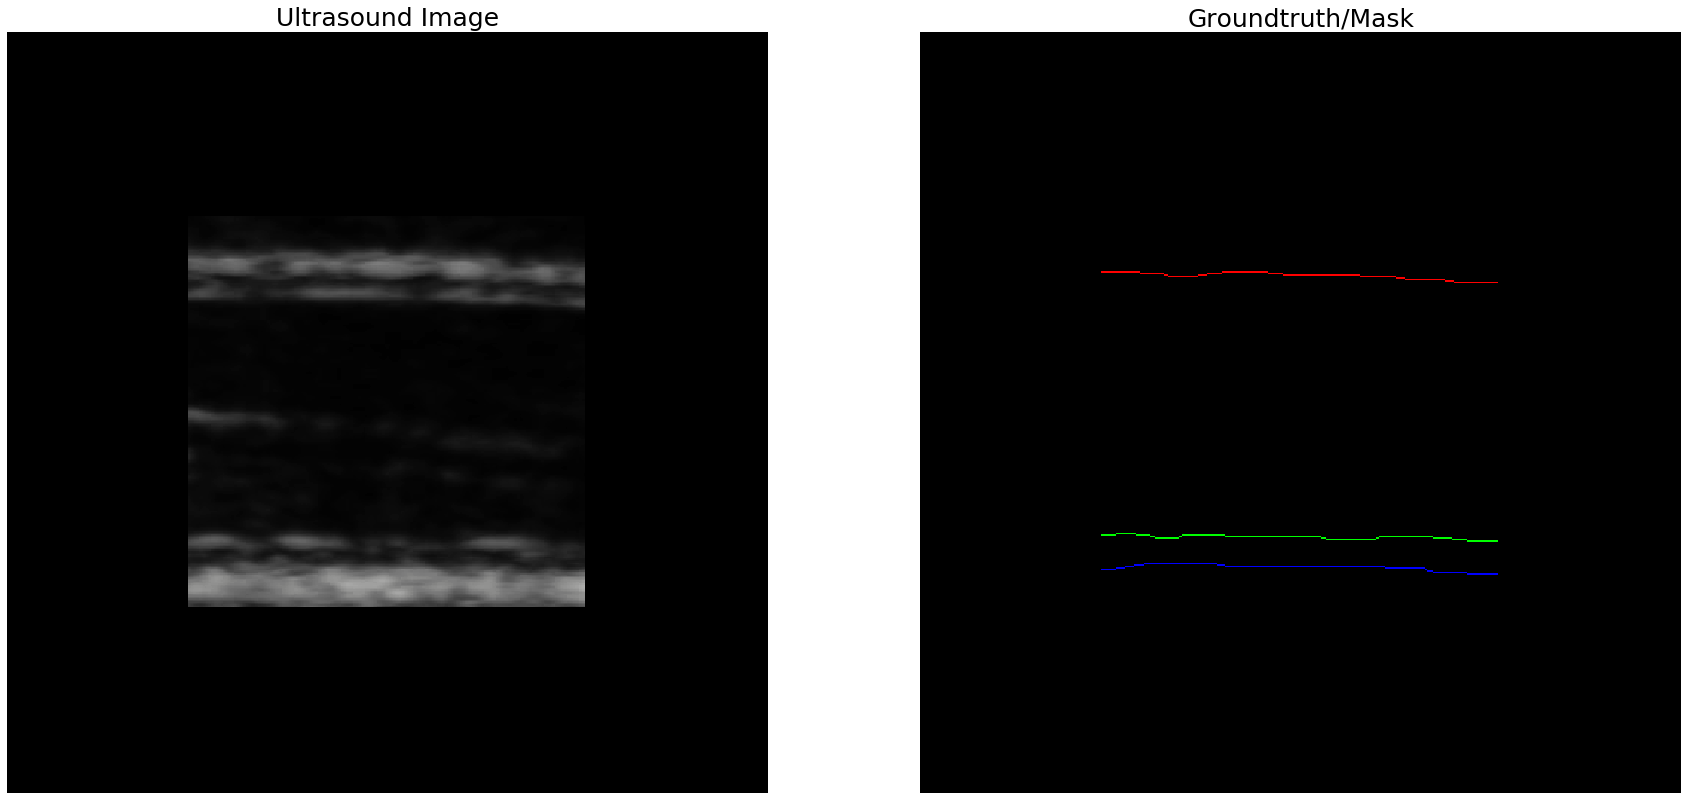

In [45]:
# plot some examples, here: ultrasound image and mask
# only plot two images next to each other else the view is too small
for index in range(0,10):
    print('File name: ' + allRes[index]['image_file'])
    print('Index: ' + str(index))
    print('IMT-Diff: ' + str(allRes[index]['imt_diff']))
    print('LD-Diff: ' + str(allRes[index]['ld_diff']))
    
    image = np.load(IMAGE_DIRECTORY + allRes[index]['image_file'])
    mask = np.load(MASK_DIRECTORY + allRes[index]['mask_file'])
    result = np.load(resultDirecotry + allRes[index]['result_file'])
    
    fig = plt.figure(figsize=(30,30))
    
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_title('Ultrasound Image',fontsize=25)
    ax1.imshow(image)
    plt.axis('off')
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.set_title('Groundtruth/Mask',fontsize=25)
    ax2.imshow(mask)
    plt.axis('off')
    
    plt.show()

File name: interobserver_medium_resultateT0_SAPCIMT-20100902-6701909-1946-M-67-2-50000045-671-LCCAE-CM-20110309-ClipResult.h5_122.npy
Index: 0
IMT-Diff: -0.06164666528755214
LD-Diff: -0.05882468191721113


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


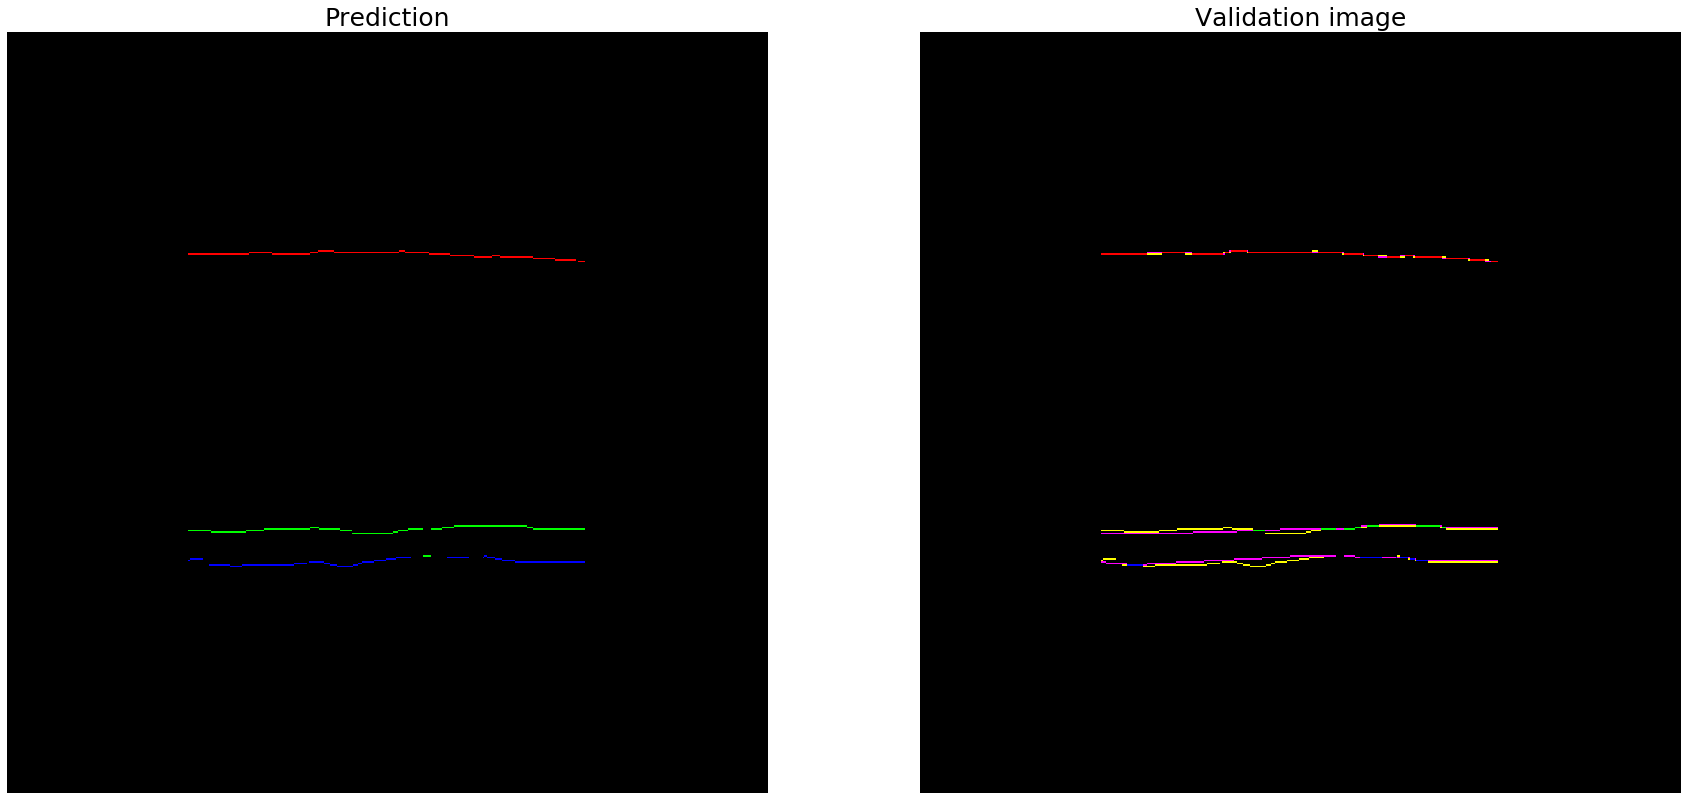

File name: interobserver_medium_resultateT0_SAPCIMT-20100901-6601595-1947-F-66-2-50000047-664-LCCAE-CM-20110309-ClipResult.h5_185.npy
Index: 1
IMT-Diff: 0.06153198919116187
LD-Diff: 0.11237750382900913


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


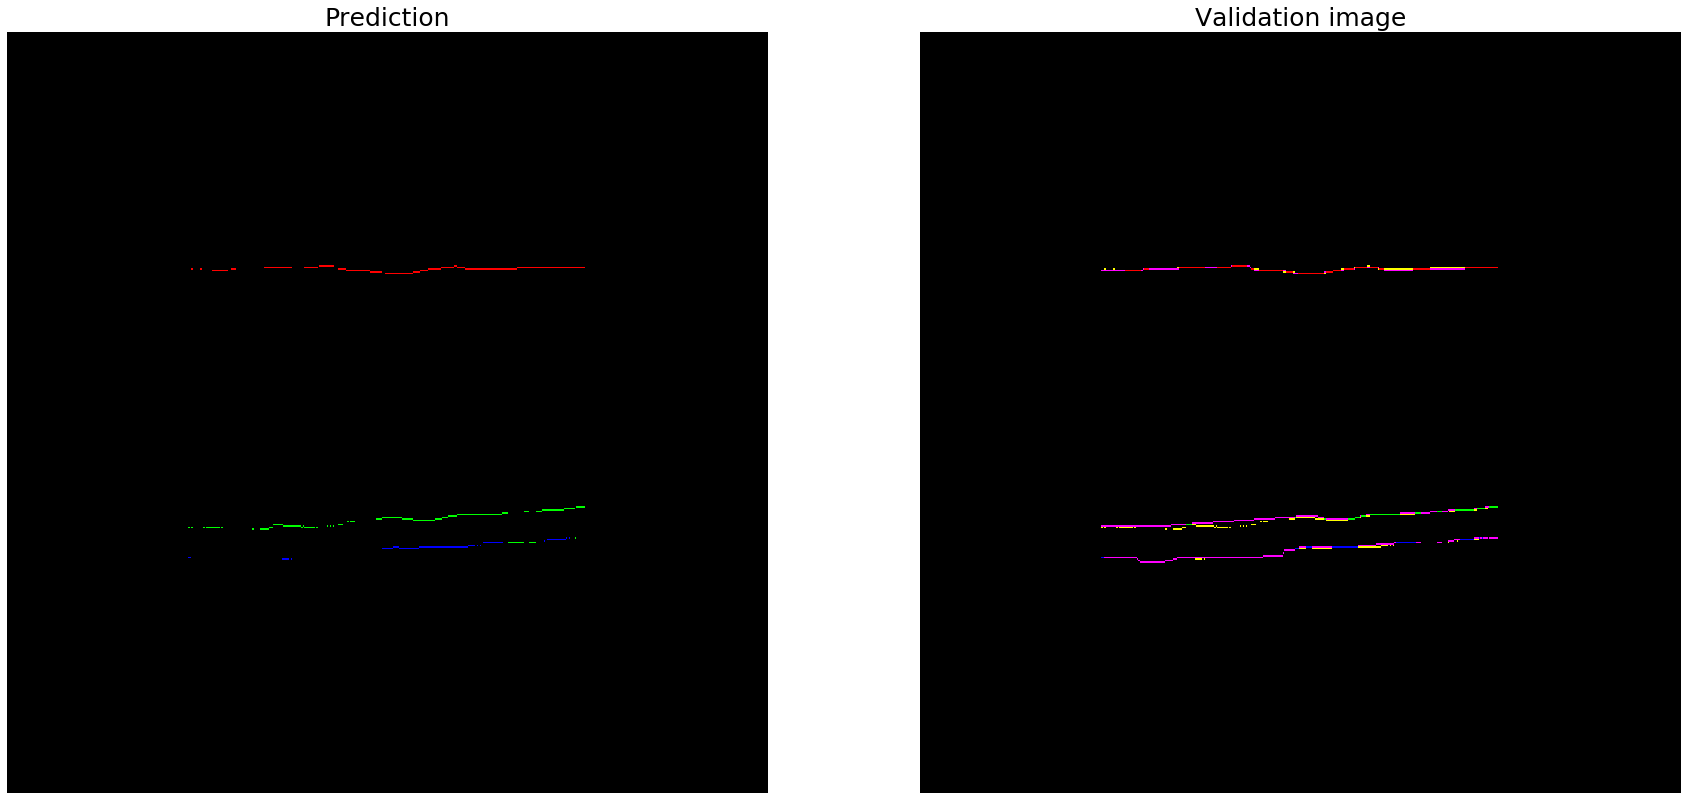

File name: interobserver_medium_resultateT0_SAPCIMT-20100901-6601595-1947-F-66-2-50000047-664-LCCAE-CM-20110309-ClipResult.h5_184.npy
Index: 2
IMT-Diff: 0.036561992653093234
LD-Diff: 0.09345268166735199


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


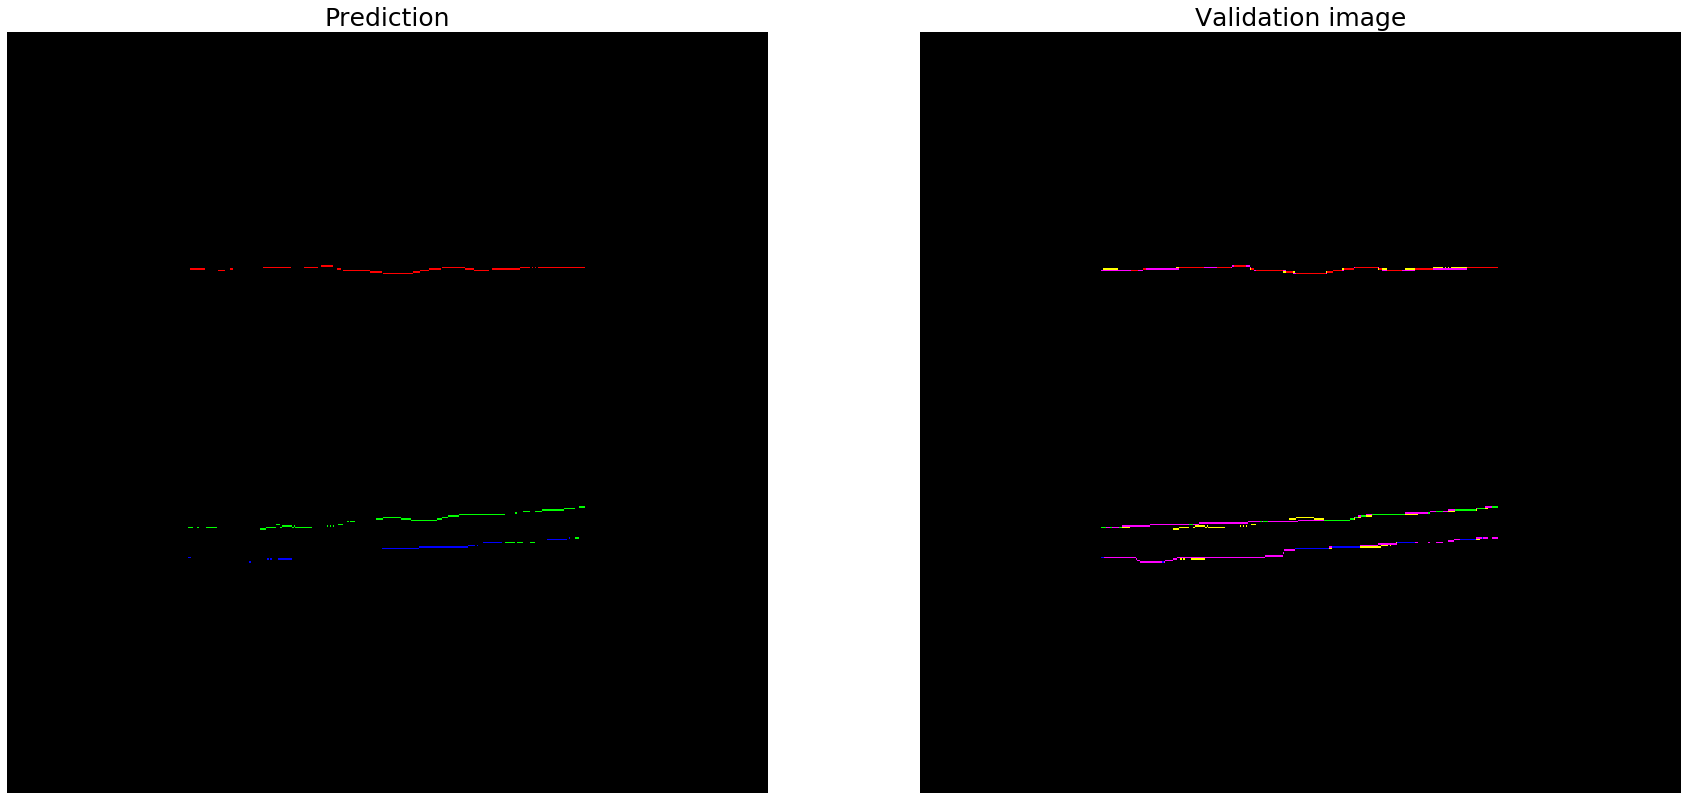

File name: interobserver_medium_resultateT0_SAPCIMT-20100901-6601595-1947-F-66-2-50000047-664-LCCAE-CM-20110309-ClipResult.h5_191.npy
Index: 3
IMT-Diff: 0.03469819234494209
LD-Diff: 0.02336343327773882


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


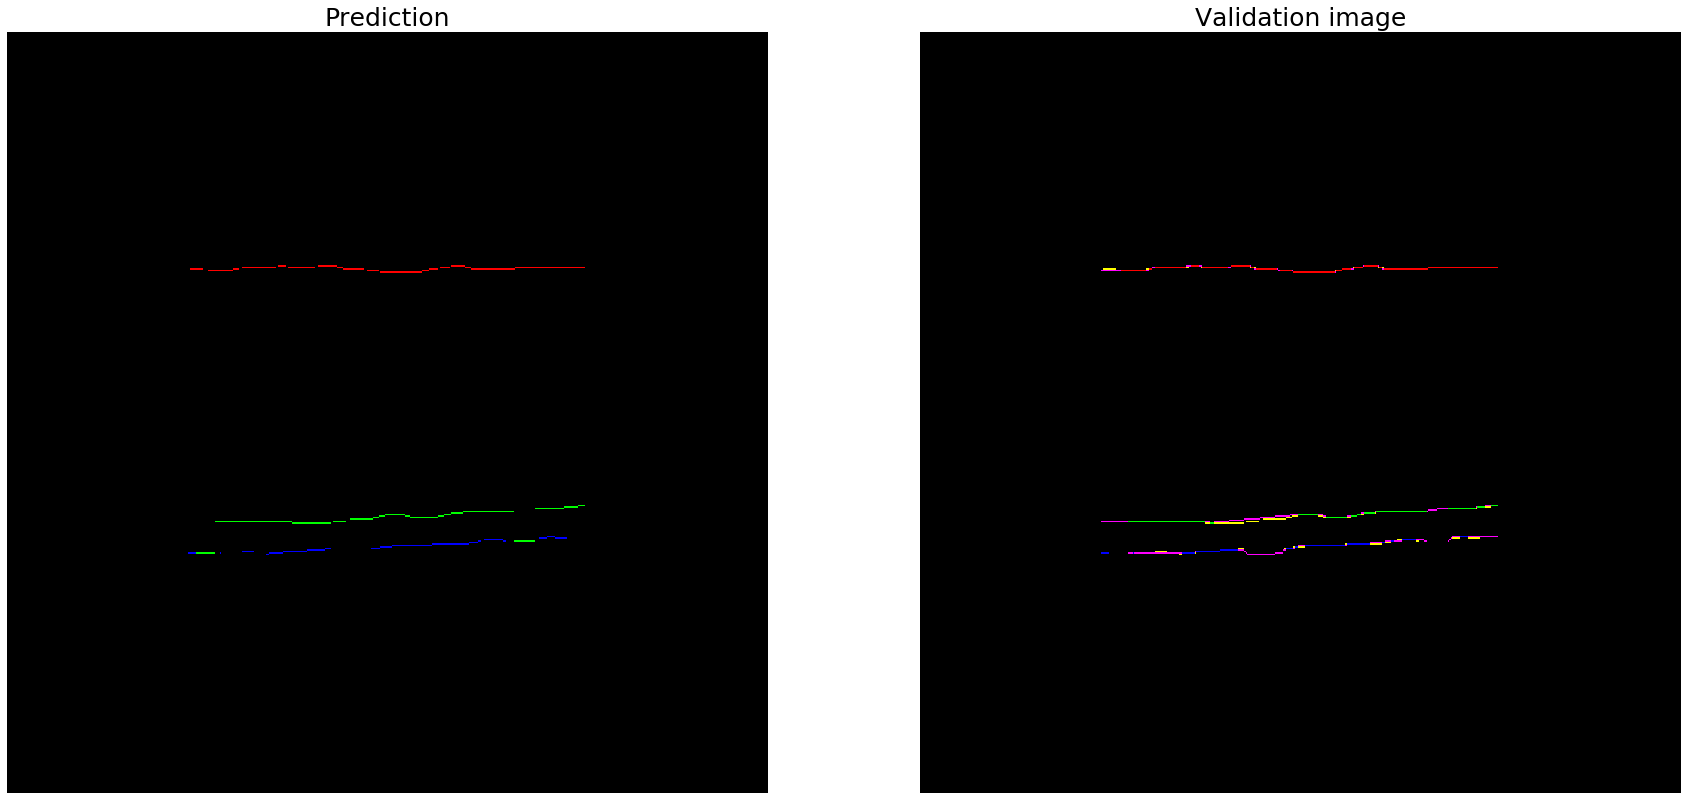

File name: interobserver_medium_resultateT0_SAPCIMT-20100902-6701909-1946-M-67-2-50000045-671-LCCAE-CM-20110309-ClipResult.h5_130.npy
Index: 4
IMT-Diff: -0.028291901361807925
LD-Diff: -0.06384065144279827


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


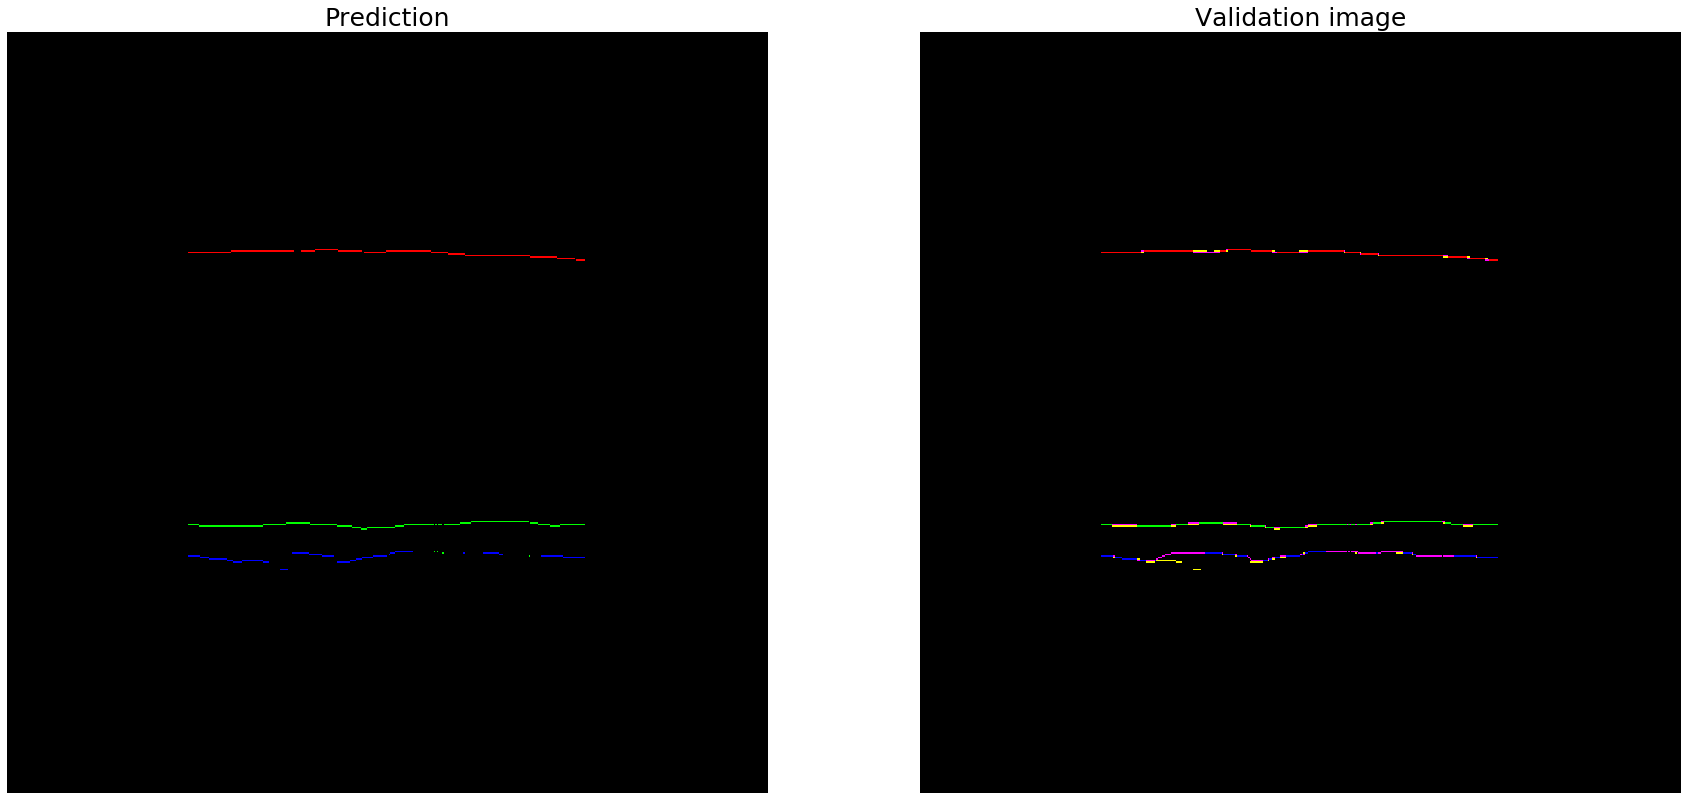

File name: interobserver_medium_resultateT0_SAPCIMT-20100901-6601595-1947-F-66-2-50000047-664-LCCAE-CM-20110309-ClipResult.h5_169.npy
Index: 5
IMT-Diff: 0.025168855458626793
LD-Diff: 0.10128709933420943


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


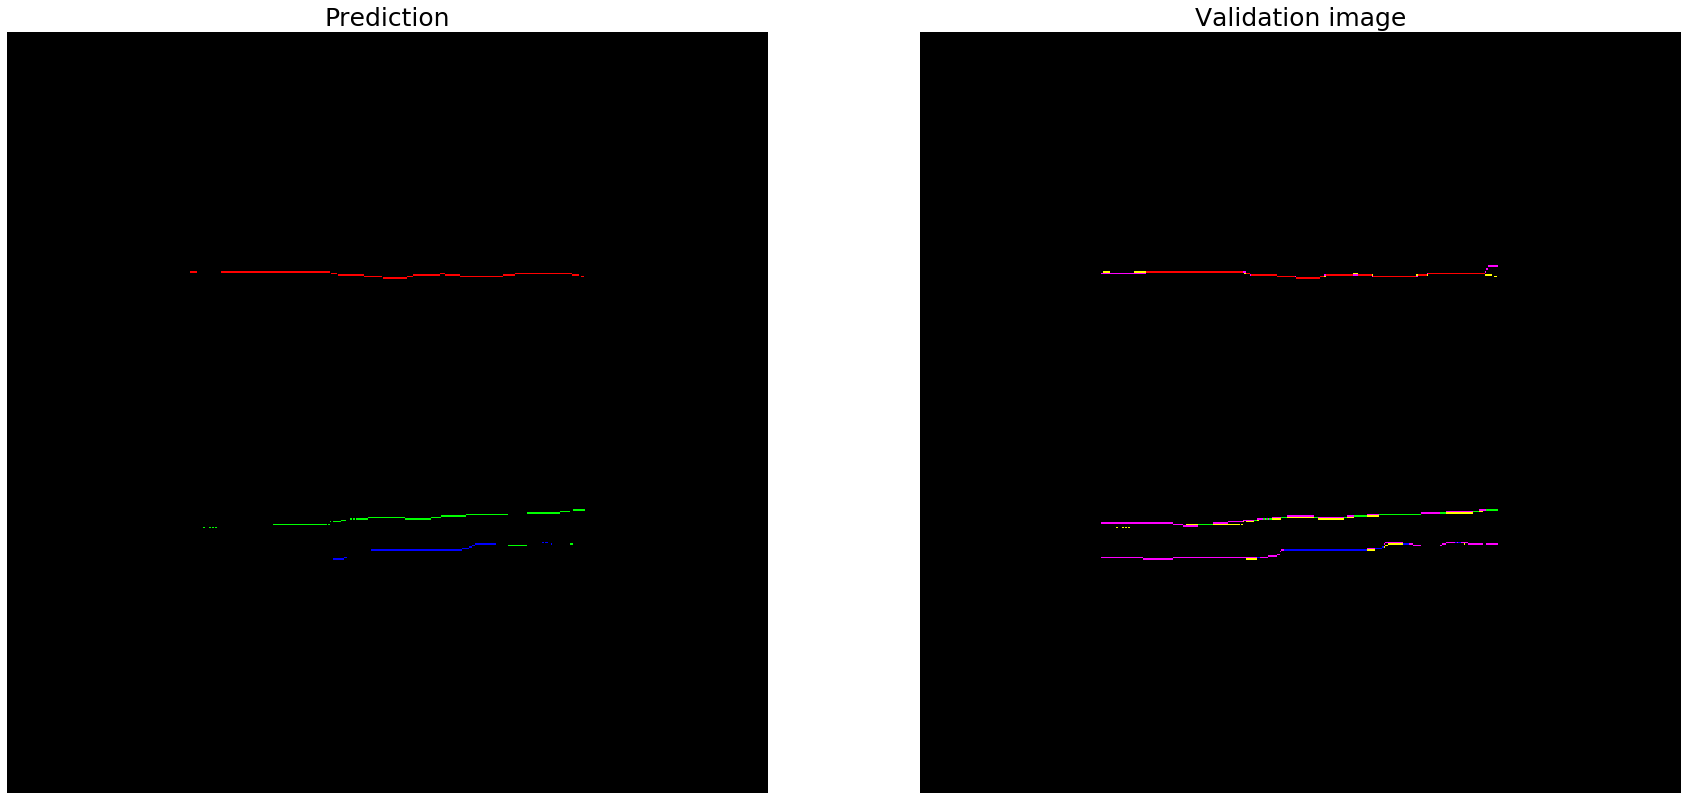

File name: interobserver_medium_resultateT0_SAPCIMT-20100901-6601595-1947-F-66-2-50000047-664-LCCAE-CM-20110309-ClipResult.h5_250.npy
Index: 6
IMT-Diff: -0.02489661802163634
LD-Diff: -0.00038690970671773073


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


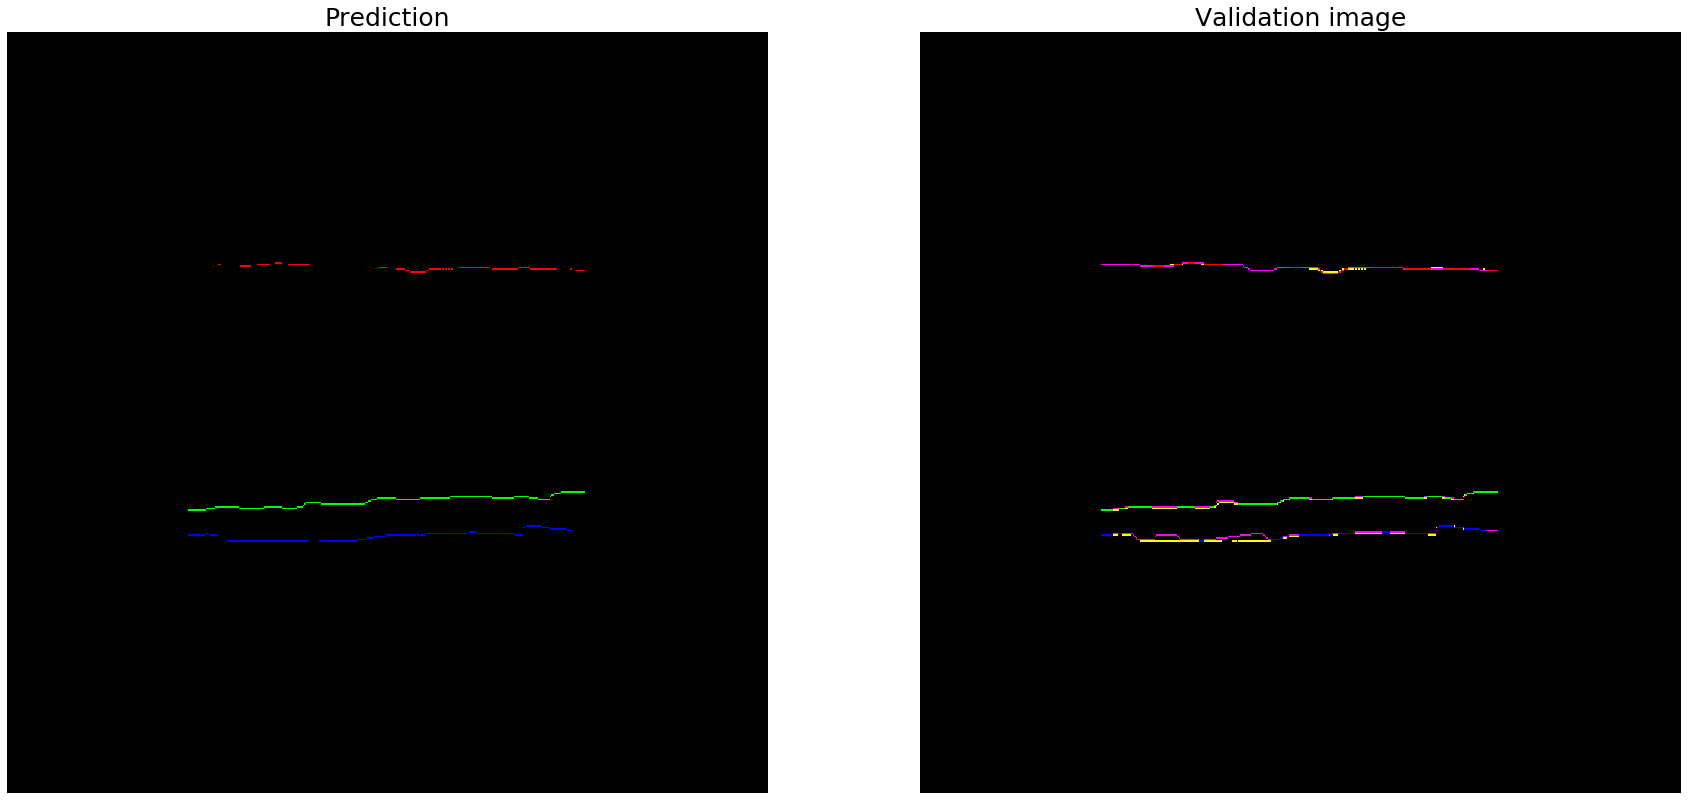

File name: interobserver_medium_resultateT0_SAPCIMT-20100901-6601595-1947-F-66-2-50000047-664-LCCAE-CM-20110309-ClipResult.h5_253.npy
Index: 7
IMT-Diff: -0.024180084177778616
LD-Diff: 0.009861670273966006


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


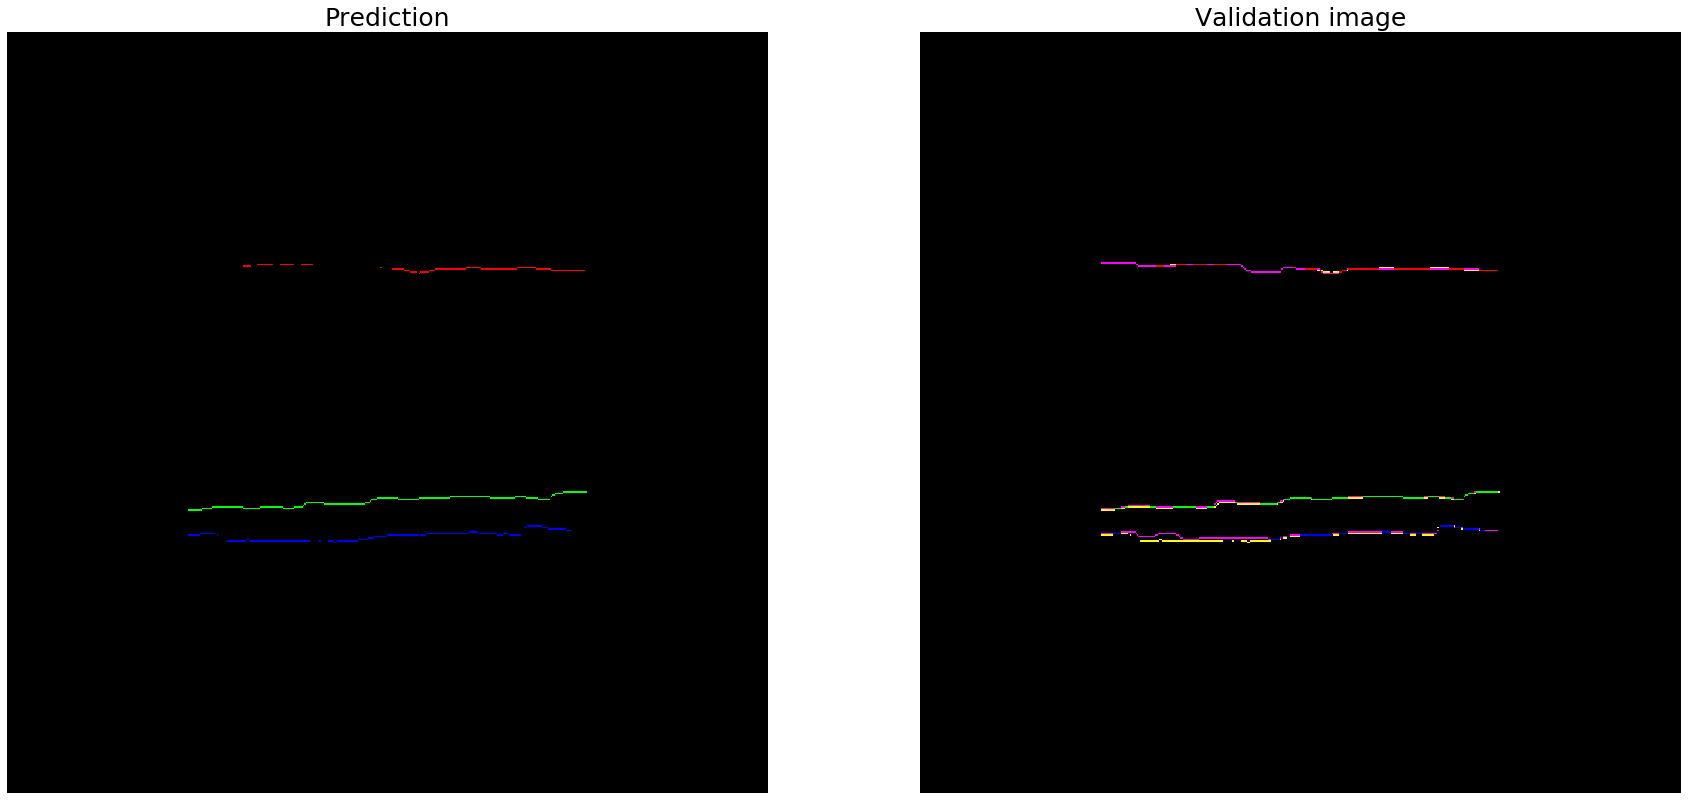

File name: interobserver_medium_resultateT0_SAPCIMT-20100901-6601595-1947-F-66-2-50000047-664-LCCAE-CM-20110309-ClipResult.h5_208.npy
Index: 8
IMT-Diff: 0.02076303679402347
LD-Diff: -0.024978640862678425


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


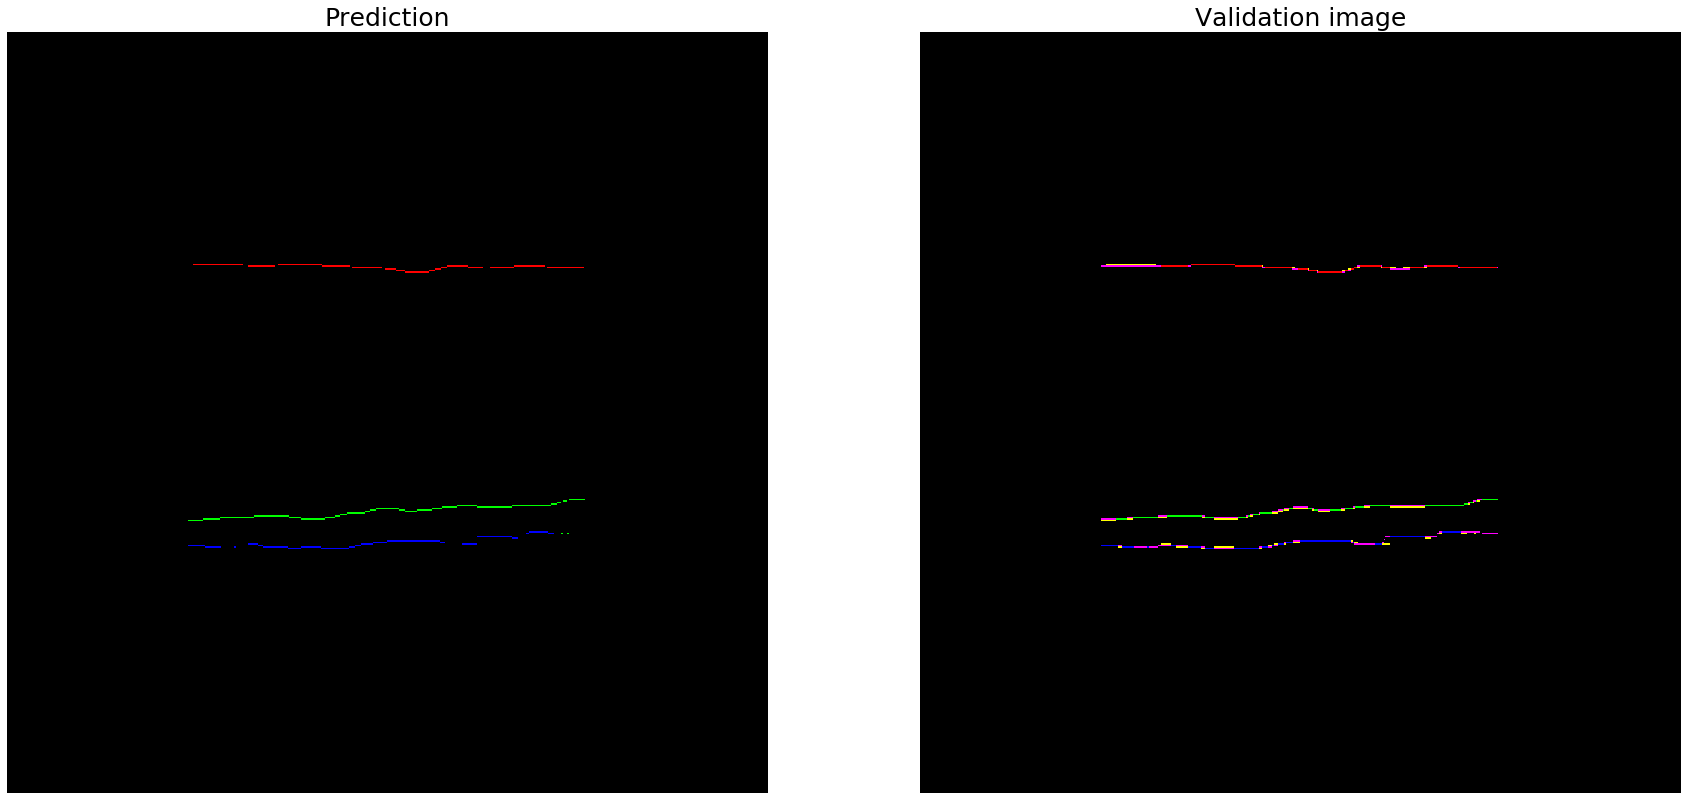

File name: interobserver_medium_resultateT1_SAPCIMT-20100902-6701909-1946-M-67-2-50000045-671-LCCAE-SC-20110311-ClipResult.h5_178.npy
Index: 9
IMT-Diff: -0.020399678895193785
LD-Diff: -0.04906573798966729


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


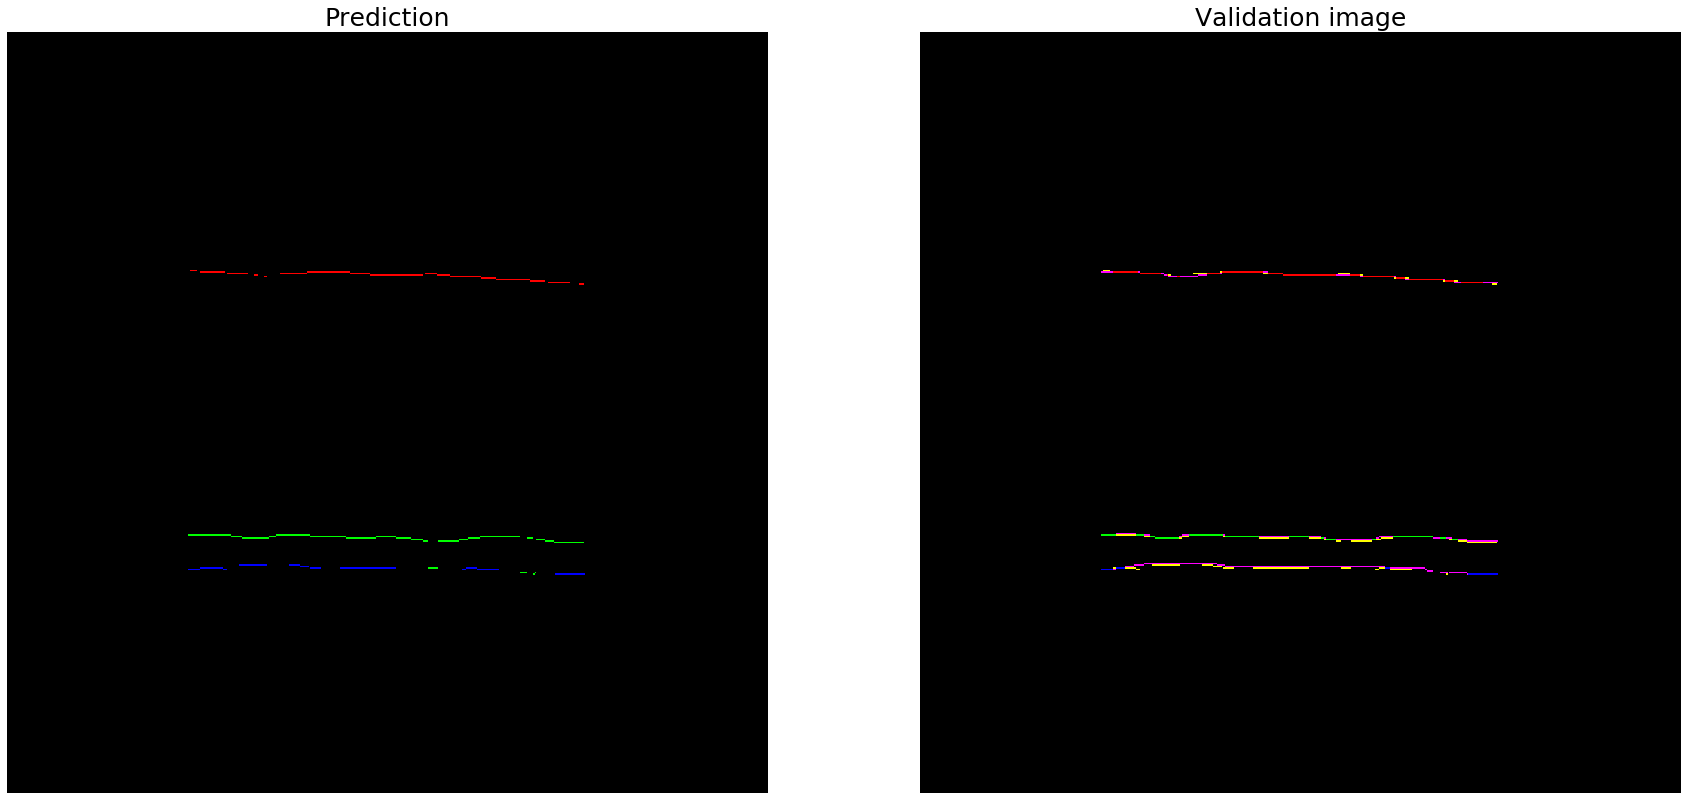

In [46]:
# plot some examples, here: prediction and validation image
# only plot two images next to each other else the view is too small
for index in range(0,10):
    print('File name: ' + allRes[index]['image_file'])
    print('Index: ' + str(index))
    print('IMT-Diff: ' + str(allRes[index]['imt_diff']))
    print('LD-Diff: ' + str(allRes[index]['ld_diff']))
    
    image = np.load(IMAGE_DIRECTORY + allRes[index]['image_file'])
    mask = np.load(MASK_DIRECTORY + allRes[index]['mask_file'])
    result = np.load(resultDirecotry + allRes[index]['result_file'])
    
    fig = plt.figure(figsize=(30,30))
    
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_title('Prediction',fontsize=25)
    ax1.imshow(result)
    plt.axis('off')
    
    mask = thinOutLinesAverage(mask)
    ax2 = fig.add_subplot(1,2,2)
    ax2.set_title('Validation image', fontsize=25)
    ax2.imshow(createValidationImage(result, mask))
    plt.axis('off')
    
    plt.show()

# Uncommented experiments and examinations

In [47]:
resultsProb = np.load(RESULT_DIRECTORY + 'allResults_probability.npy', allow_pickle=True)
resultsAver = np.load(RESULT_DIRECTORY + 'allResults_average.npy', allow_pickle=True)

In [48]:
resultsProb

array([{'image_file': 'interobserver_medium_resultateT1_SAPCIMT-20100902-6701909-1946-M-67-2-50000045-671-LCCAE-SC-20110311-ClipResult.h5_106.npy', 'mask_file': 'interobserver_medium_resultateT1_SAPCIMT-20100902-6701909-1946-M-67-2-50000045-671-LCCAE-SC-20110311-ClipResult.h5_106_mask.npy', 'result_file': 'interobserver_medium_resultateT1_SAPCIMT-20100902-6701909-1946-M-67-2-50000045-671-LCCAE-SC-20110311-ClipResult.h5_106_probability.npy', 'trueIMT_tuple': (0.7664417948403301, 7.44859221888636, 1.0, 1.0), 'imt_tuple': (0.7668359970860231, 7.466199117969906, 0.9363295880149812, 0.9213483146067416), 'imt_diff': -0.00039420224569297613, 'ld_diff': -0.017606899083546068},
       {'image_file': 'interobserver_medium_resultateT1_SAPCIMT-20100902-6701909-1946-M-67-2-50000045-671-LCCAE-SC-20110311-ClipResult.h5_178.npy', 'mask_file': 'interobserver_medium_resultateT1_SAPCIMT-20100902-6701909-1946-M-67-2-50000045-671-LCCAE-SC-20110311-ClipResult.h5_178_mask.npy', 'result_file': 'interobserver_

In [49]:
ldhole = []
imthole = []
for res in resultsProb:
    if (res['imt_tuple'][3] < 1.0):
        ldhole.append(res)
    if (res['imt_tuple'][2] < 1.0):
        imthole.append(res)

In [50]:
len(ldhole)

106

In [51]:
len(imthole)

75

In [52]:
plotlist = []
for imt in resultsAver:
    plotlist.append(imt['ld_diff'])

In [53]:
plotlist = sorted(plotlist, key = lambda i: abs(i), reverse=True) 

In [54]:
len(plotlist)

107

In [55]:
plotlist

[0.11538500456765632,
 0.10394972432409233,
 0.09669710010162458,
 -0.05779102860306118,
 -0.05228488099490747,
 -0.04854255088806081,
 0.04401391155985568,
 -0.04238768336922938,
 0.040602316233762537,
 -0.039524406591379346,
 -0.03724991814241285,
 -0.036142181763662684,
 -0.034282670711501595,
 -0.03186521785644025,
 -0.0316545817047329,
 -0.031389135960622205,
 -0.027429651214772477,
 -0.027221781028131886,
 -0.027003694346488416,
 -0.02591656737287007,
 0.02518436132752111,
 -0.024847402816371655,
 -0.02375216726633589,
 -0.022399134746344807,
 -0.021214534571865507,
 -0.02066607787090824,
 -0.020408227241606625,
 -0.02022008897408334,
 -0.0194096532559227,
 0.018368753635306767,
 -0.017449450108678377,
 -0.01733924427008482,
 -0.016683202183795487,
 0.01621671551778281,
 -0.015724707936064952,
 -0.0157056489460059,
 -0.015684823094336053,
 -0.015580116621867646,
 -0.015343504404989439,
 -0.014295720882154583,
 -0.014179296538189057,
 0.013576030611018197,
 -0.01344001134772288,
 

In [56]:
plotlist[0]

0.11538500456765632

In [57]:
plotlist[106]

3.327681294873486e-05

Text(0, 0.5, 'Frequency')

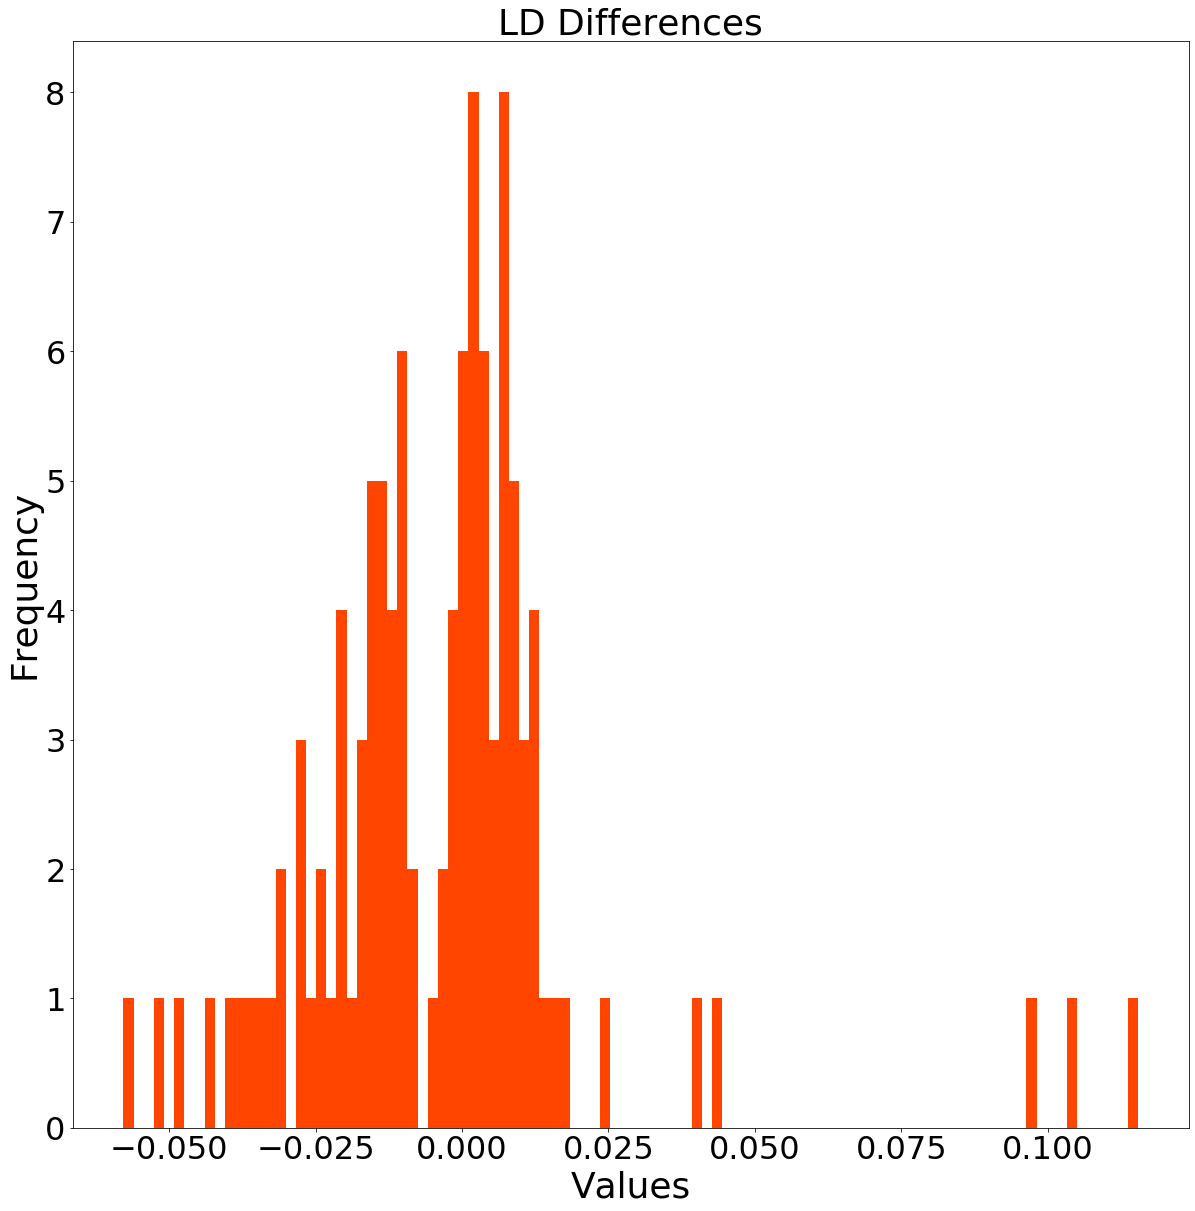

In [58]:
fig = plt.figure(figsize=(20,20))
plt.hist(plotlist,100, color='orangered')

plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.title("LD Differences",fontsize=36)
plt.xlabel("Values",fontsize=36)
plt.ylabel("Frequency",fontsize=36)